In [1]:
import pandas as pd
from pathlib import Path
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
output_dir = "dist/charts"
os.makedirs(output_dir, exist_ok=True)

In [3]:
# def export_to_parquet(folder_name, output_filename="combined_data.parquet"):
#     """
#     Read all Excel files in the given folder (including all sheets),
#     normalize column names, concatenate into a single DataFrame,
#     and write the result to a Parquet file.

#     Args:
#         folder_name (str): Path to folder containing .xlsx files.
#         output_filename (str): Output Parquet filename.
#     """
#     data_dir = Path(folder_name)
#     all_dfs = []

#     # 1. Collect all data from each Excel file and each sheet
#     for file_path in data_dir.glob("*.xlsx"):
#         print(f"Reading: {file_path.name}")
#         # Read all sheets into a dict: {sheet_name: DataFrame}
#         excel_data = pd.read_excel(file_path, sheet_name=None)
        
#         for sheet_name, df in excel_data.items():
#             # Add metadata columns to keep track of origin
#             df['origin_file'] = file_path.name
#             df['origin_sheet'] = str(sheet_name)
            
#             # Ensure all column names are strings (Parquet requires string column names)
#             df.columns = df.columns.astype(str)
            
#             all_dfs.append(df)

#     if not all_dfs:
#         print("No data found to export.")
#         return

#     # 2. Concatenate all DataFrames into a single DataFrame
#     final_df = pd.concat(all_dfs, ignore_index=True)

#     # Normalize column names: remove accents, make lowercase, replace spaces with underscores
#     final_df.columns = [unidecode(col).lower().replace(' ', '_') for col in final_df.columns]

#     final_df = final_df[final_df['sobaodanh'].notna()]
#     final_df['sobaodanh'] = final_df['sobaodanh'].astype(int).astype(str).str.zfill(8)

#     # Select and reorder the columns we care about. If some columns are missing, this will raise a KeyError.
#     # (Keep this explicit selection to preserve a consistent schema across inputs.)
#     final_df = final_df[['sobaodanh', 'toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc',
#        'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep', 'su', 'dia',
#        'giao_duc_kinh_te_va_phap_luat', 'ngoai_ngu', 'giao_duc_cong_dan',
#        'ma_mon_ngoai_ngu', 'origin_file', 'origin_sheet']]
    
#     # String columns
#     string_cols = [
#         'sobaodanh',
#         'ma_mon_ngoai_ngu',
#         'origin_file',
#         'origin_sheet'
#     ]

#     for col in string_cols:
#         if col in final_df.columns:
#             final_df[col] = final_df[col].astype('string')

#     # Score columns → float32 (memory efficient)
#     score_cols = [
#         'toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc',
#         'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep',
#         'su', 'dia', 'giao_duc_kinh_te_va_phap_luat',
#         'ngoai_ngu', 'giao_duc_cong_dan'
#     ]

#     for col in score_cols:
#         if col in final_df.columns:
#             final_df[col] = pd.to_numeric(final_df[col], errors='coerce').astype('float32')

#     final_df = final_df.sort_values('sobaodanh').reset_index(drop=True)
    
#     # 3. Export to Parquet using pyarrow (fast and supports complex types)
#     final_df.to_parquet(output_filename, engine='pyarrow', index=False)
    
#     print("-" * 30)
#     print(f"Success: data exported to {output_filename}")
#     print(f"Total rows: {len(final_df)}")
#     print(f"Total columns: {len(final_df.columns)}")

# # Execute the export on the 'raw_data' folder
# export_to_parquet("raw_data")

In [4]:
# Read the combined Parquet file and display the first few rows
df = pd.read_parquet('combined_data.parquet')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153226 entries, 0 to 1153225
Data columns (total 20 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   sobaodanh                      1153226 non-null  string 
 1   toan                           1137417 non-null  float32
 2   van                            1144098 non-null  float32
 3   li                             351733 non-null   float32
 4   hoa                            244283 non-null   float32
 5   sinh                           71616 non-null    float32
 6   tin_hoc                        7602 non-null     float32
 7   cong_nghe_cong_nghiep          2290 non-null     float32
 8   cong_nghe_nong_nghiep          22048 non-null    float32
 9   su                             495165 non-null   float32
 10  dia                            489581 non-null   float32
 11  giao_duc_kinh_te_va_phap_luat  246401 non-null   float32
 12  ngoai_ngu     

In [5]:
# ==============================
# Global Style
# ==============================
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Assume df is already loaded in a previous cell
# df = pd.read_parquet("combined_data.parquet")

bins = np.arange(0, 10.5, 0.5)

# Human-readable Vietnamese display names for each subject column
SUBJECT_LABELS = {
    "toan":                        "Toán",
    "van":                         "Ngữ văn",
    "li":                          "Vật lí",
    "hoa":                         "Hóa học",
    "sinh":                        "Sinh học",
    "tin_hoc":                     "Tin học",
    "cong_nghe_cong_nghiep":       "Công nghệ Công nghiệp",
    "cong_nghe_nong_nghiep":       "Công nghệ Nông nghiệp",
    "su":                          "Lịch sử",
    "dia":                         "Địa lí",
    "giao_duc_kinh_te_va_phap_luat": "Giáo dục Kinh tế và Pháp luật",
    "ngoai_ngu":                   "Ngoại ngữ",
    "giao_duc_cong_dan":           "Giáo dục Công dân",
}

# Vietnamese labels for each foreign-language code
FOREIGN_LANG_LABELS = {
    "N1": "Tiếng Anh",
    "N2": "Tiếng Nga",
    "N3": "Tiếng Pháp",
    "N4": "Tiếng Trung",
    "N5": "Tiếng Đức",
    "N6": "Tiếng Nhật",
    "N7": "Tiếng Hàn",
}

def plot_and_save(data, title, filename):
    """Plot a histogram of score data, annotate it with summary stats, and save to disk."""
    n = len(data)
    mean = data.mean()
    median = data.median()
    std = data.std()
    count_10 = (data == 10).sum()
    count_0 = (data == 0).sum()

    # Create figure and axes explicitly
    fig, ax = plt.subplots(figsize=(9, 6))

    sns.histplot(
        data,
        bins=bins,
        binrange=(0, 10),
        kde=False,
        ax=ax
    )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Điểm số")
    ax.set_ylabel("Số lượng thí sinh")
    ax.set_xlim(0, 10)
    ax.set_xticks(bins)

    # Summary statistics box — labels kept in Vietnamese for the rendered chart
    summary_text = (
        f"Số thí sinh: {n:,}\n"
        f"ĐTB: {mean:.2f}\n"
        f"Trung vị: {median:.2f}\n"
        f"Độ lệch chuẩn: {std:.2f}\n"
        f"Số điểm 10: {count_10:,}\n"
        f"Số điểm 0: {count_0:,}"
    )

    # Place the text box inside the chart area; adjust coordinates if needed
    plt.gcf().text(
        0.15, 0.7,
        summary_text,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
    )

    plt.tight_layout()

    # KEY: save before show to capture the full layout including the text box
    plt.savefig(filename, dpi=120, bbox_inches='tight')

    # Comment out plt.show() when processing many charts to avoid blocking
    # plt.show()

    plt.close(fig)  # Release memory after saving

# ==============================
# Loop over all numeric score columns (except ngoai_ngu, handled separately)
# ==============================

score_columns = df.select_dtypes(include=["float32", "float64"]).columns
score_columns = score_columns.drop("ngoai_ngu", errors="ignore")

for col in score_columns:
    data = df[col].dropna()
    if not data.empty:
        file_path = os.path.join(output_dir, f"{col}.png")
        # Use the Vietnamese display name for the chart title if available
        label = SUBJECT_LABELS.get(col, col)
        plot_and_save(data, f"Phân bố điểm - {label}", file_path)
        print(f"--- Saved: {col}.png")

# ==============================
# Handle Foreign Language subject (split by language code N1–N7)
# ==============================
if "ngoai_ngu" in df.columns and "ma_mon_ngoai_ngu" in df.columns:
    print("\n--- Exporting foreign language score charts (N1–N7) ---")

    # Keep only rows where both the score and language code are present
    langs = df[["ngoai_ngu", "ma_mon_ngoai_ngu"]].dropna(subset=["ngoai_ngu", "ma_mon_ngoai_ngu"])

    # Iterate over each language code (N1, N2, ..., N7)
    for code, group in langs.groupby("ma_mon_ngoai_ngu"):

        # Build the output file path (e.g., ngoai_ngu_N1.png)
        filename = f"ngoai_ngu_{code}.png"
        file_path = os.path.join(output_dir, filename)

        # Use the Vietnamese language name for the chart title
        lang_name = FOREIGN_LANG_LABELS.get(code, code)
        chart_title = f"Phân bố điểm Ngoại ngữ - {lang_name} ({code})"

        plot_and_save(group["ngoai_ngu"], chart_title, file_path)
        print(f"   [OK] Saved: {filename}")

print(f"\nDone! All charts saved to folder: '{output_dir}'")

--- Saved: toan.png
--- Saved: van.png
--- Saved: li.png
--- Saved: hoa.png
--- Saved: sinh.png
--- Saved: tin_hoc.png
--- Saved: cong_nghe_cong_nghiep.png
--- Saved: cong_nghe_nong_nghiep.png
--- Saved: su.png
--- Saved: dia.png
--- Saved: giao_duc_kinh_te_va_phap_luat.png
--- Saved: giao_duc_cong_dan.png

--- Exporting foreign language score charts (N1–N7) ---
   [OK] Saved: ngoai_ngu_N1.png
   [OK] Saved: ngoai_ngu_N2.png
   [OK] Saved: ngoai_ngu_N3.png
   [OK] Saved: ngoai_ngu_N4.png
   [OK] Saved: ngoai_ngu_N5.png
   [OK] Saved: ngoai_ngu_N6.png
   [OK] Saved: ngoai_ngu_N7.png

Done! All charts saved to folder: 'dist/charts'


In [6]:
# df = pd.read_parquet('combined_data.parquet')

# df['ma_tinh'] = df['sobaodanh'].str[:2]
# print(df.head())

# df.to_parquet('combined_data.parquet', engine='pyarrow', index=False)

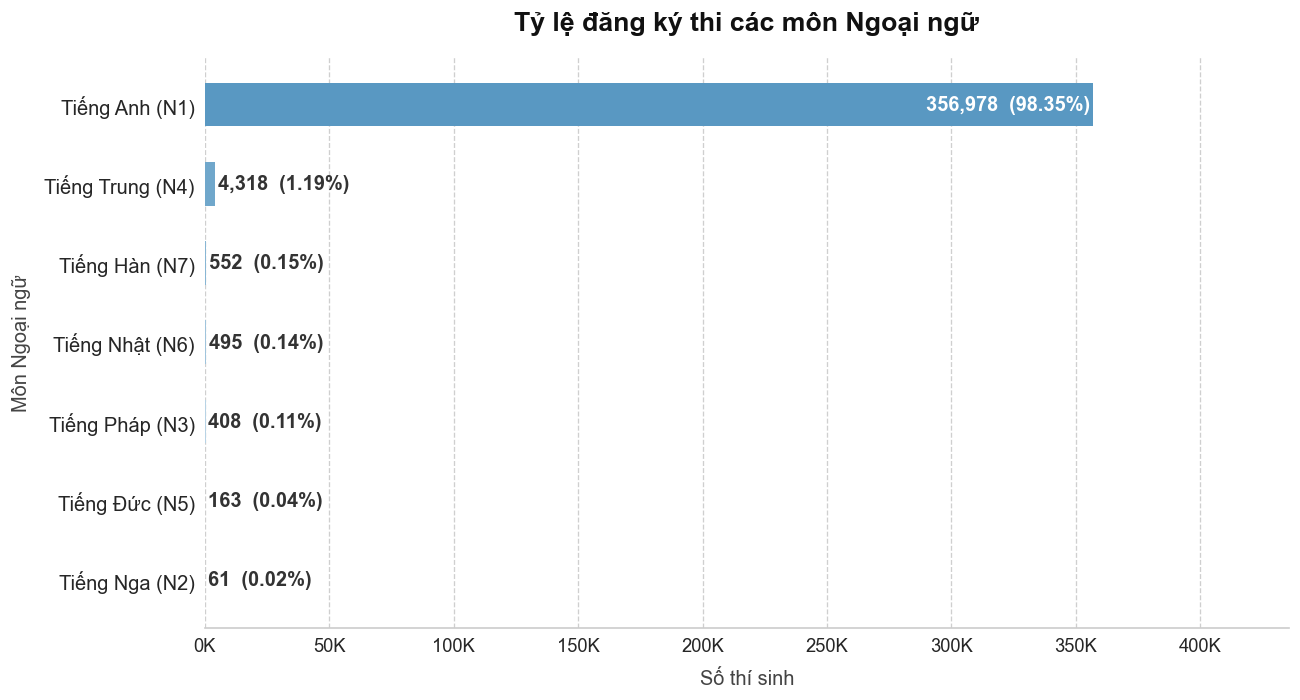

Saved: dist/charts/ngoai_ngu_bar.png


In [7]:

# ==============================
# Bar chart – Tỷ lệ đăng ký các môn Ngoại ngữ
# ==============================
df = pd.read_parquet('combined_data.parquet')

lang_counts = (
    df[df['ma_mon_ngoai_ngu'].notna() & df['ngoai_ngu'].notna()]
    ['ma_mon_ngoai_ngu']
    .value_counts()
    .sort_values(ascending=True)
)

FOREIGN_LANG_LABELS = {
    "N1": "Tiếng Anh",
    "N2": "Tiếng Nga",
    "N3": "Tiếng Pháp",
    "N4": "Tiếng Trung",
    "N5": "Tiếng Đức",
    "N6": "Tiếng Nhật",
    "N7": "Tiếng Hàn",
}

total     = lang_counts.sum()
y_labels  = [f"{FOREIGN_LANG_LABELS.get(c, c)} ({c})" for c in lang_counts.index]
counts    = lang_counts.values

# ── Palette đồng bộ: dùng 1 màu chủ đạo, độ đậm tăng dần theo giá trị ──
base_color = "#2176AE"
n = len(counts)
bar_colors = [
    (*[c + (1 - c) * (1 - (i + 1) / n * 0.75) for c in plt.matplotlib.colors.to_rgb(base_color)],)
    for i in range(n)
]

with plt.style.context("seaborn-v0_8-whitegrid"):
    fig, ax = plt.subplots(figsize=(11, 6))
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    bars = ax.barh(y_labels, counts, color=bar_colors, edgecolor="none",
                   height=0.55)

    # ── Data labels ──
    for bar, count in zip(bars, counts):
        pct     = count / total * 100
        lbl     = f"{count:,}  ({pct:.2f}%)"
        x_end   = bar.get_width()
        y_mid   = bar.get_y() + bar.get_height() / 2
        if count / total > 0.08:                    # thanh dài → nhãn bên trong
            ax.text(x_end - total * 0.004, y_mid, lbl,
                    ha="right", va="center", fontsize=12,
                    fontweight="bold", color="white")
        else:                                        # thanh ngắn → nhãn bên ngoài
            ax.text(x_end + total * 0.003, y_mid, lbl,
                    ha="left",  va="center", fontsize=12,
                    fontweight="bold", color="#333333")

    # ── Grid dashed mờ ──
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color="#BBBBBB", linestyle="--", linewidth=0.8, alpha=0.7)
    ax.yaxis.grid(False)

    # ── Trục & nhãn ──
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1000:.0f}K"))
    ax.tick_params(axis="x", labelsize=11, length=0, pad=6)
    ax.tick_params(axis="y", labelsize=12, length=0, pad=6)
    ax.set_xlim(right=max(counts) * 1.22)

    ax.set_title("Tỷ lệ đăng ký thi các môn Ngoại ngữ",
                 fontsize=16, fontweight="bold", pad=16, color="#111111")
    ax.set_xlabel("Số thí sinh", fontsize=12, labelpad=8, color="#444444")
    ax.set_ylabel("Môn Ngoại ngữ", fontsize=12, labelpad=8, color="#444444")

    # ── Chỉ giữ viền dưới (baseline) ──
    for side in ["top", "right", "left"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("#CCCCCC")

    plt.tight_layout()
    plt.savefig(f"{output_dir}/ngoai_ngu_bar.png", dpi=120, bbox_inches="tight")
    plt.show()

print(f"Saved: {output_dir}/ngoai_ngu_bar.png")


In [8]:
province_code = {
    "Hà Nội": "01",
    "TP. Hồ Chí Minh": "02",
    "Hải Phòng": "03",
    "Đà Nẵng": "04",
    "Hà Giang": "05",
    "Cao Bằng": "06",
    "Lai Châu": "07",
    "Lào Cai": "08",
    "Tuyên Quang": "09",
    "Lạng Sơn": "10",
    "Bắc Kạn": "11",
    "Thái Nguyên": "12",
    "Yên Bái": "13",
    "Sơn La": "14",
    "Phú Thọ": "15",
    "Vĩnh Phúc": "16",
    "Quảng Ninh": "17",
    "Bắc Giang": "18",
    "Bắc Ninh": "19",
    "Hải Dương": "21",
    "Hưng Yên": "22",
    "Hòa Bình": "23",
    "Hà Nam": "24",
    "Nam Định": "25",
    "Thái Bình": "26",
    "Ninh Bình": "27",
    "Thanh Hóa": "28",
    "Nghệ An": "29",
    "Hà Tĩnh": "30",
    "Quảng Bình": "31",
    "Quảng Trị": "32",
    "Thừa Thiên Huế": "33",
    "Quảng Nam": "34",
    "Quảng Ngãi": "35",
    "Kon Tum": "36",
    "Bình Định": "37",
    "Gia Lai": "38",
    "Phú Yên": "39",
    "Đắk Lắk": "40",
    "Khánh Hòa": "41",
    "Lâm Đồng": "42",
    "Bình Phước": "43",
    "Bình Dương": "44",
    "Ninh Thuận": "45",
    "Tây Ninh": "46",
    "Bình Thuận": "47",
    "Đồng Nai": "48",
    "Long An": "49",
    "Đồng Tháp": "50",
    "An Giang": "51",
    "Bà Rịa - Vũng Tàu": "52",
    "Tiền Giang": "53",
    "Kiên Giang": "54",
    "Cần Thơ": "55",
    "Bến Tre": "56",
    "Vĩnh Long": "57",
    "Trà Vinh": "58",
    "Sóc Trăng": "59",
    "Bạc Liêu": "60",
    "Cà Mau": "61",
    "Điện Biên": "62",
    "Đắk Nông": "63",
    "Hậu Giang": "64",
}
code_province = {v: k for k, v in province_code.items()}
print(code_province)

province_new_province = {
    # ===== Các tỉnh sáp nhập =====

    # Tuyên Quang + Hà Giang -> Tuyên Quang
    "Tuyên Quang": "Tuyên Quang",
    "Hà Giang": "Tuyên Quang",

    # Yên Bái + Lào Cai -> Lào Cai
    "Yên Bái": "Lào Cai",
    "Lào Cai": "Lào Cai",

    # Bắc Kạn + Thái Nguyên -> Thái Nguyên
    "Bắc Kạn": "Thái Nguyên",
    "Thái Nguyên": "Thái Nguyên",

    # Vĩnh Phúc + Hòa Bình + Phú Thọ -> Phú Thọ
    "Vĩnh Phúc": "Phú Thọ",
    "Hòa Bình": "Phú Thọ",
    "Phú Thọ": "Phú Thọ",

    # Bắc Giang + Bắc Ninh -> Bắc Ninh
    "Bắc Giang": "Bắc Ninh",
    "Bắc Ninh": "Bắc Ninh",

    # Thái Bình + Hưng Yên -> Hưng Yên
    "Thái Bình": "Hưng Yên",
    "Hưng Yên": "Hưng Yên",

    # Hải Phòng + Hải Dương -> Hải Phòng
    "Hải Phòng": "Hải Phòng",
    "Hải Dương": "Hải Phòng",

    # Hà Nam + Nam Định + Ninh Bình -> Ninh Bình
    "Hà Nam": "Ninh Bình",
    "Nam Định": "Ninh Bình",
    "Ninh Bình": "Ninh Bình",

    # Quảng Bình + Quảng Trị -> Quảng Trị
    "Quảng Bình": "Quảng Trị",
    "Quảng Trị": "Quảng Trị",

    # Đà Nẵng + Quảng Nam -> Đà Nẵng
    "Đà Nẵng": "Đà Nẵng",
    "Quảng Nam": "Đà Nẵng",

    # Kon Tum + Quảng Ngãi -> Quảng Ngãi
    "Kon Tum": "Quảng Ngãi",
    "Quảng Ngãi": "Quảng Ngãi",

    # Bình Định + Gia Lai -> Gia Lai
    "Bình Định": "Gia Lai",
    "Gia Lai": "Gia Lai",

    # Ninh Thuận + Khánh Hòa -> Khánh Hòa
    "Ninh Thuận": "Khánh Hòa",
    "Khánh Hòa": "Khánh Hòa",

    # Đắk Nông + Bình Thuận + Lâm Đồng -> Lâm Đồng
    "Đắk Nông": "Lâm Đồng",
    "Bình Thuận": "Lâm Đồng",
    "Lâm Đồng": "Lâm Đồng",

    # Phú Yên + Đắk Lắk -> Đắk Lắk
    "Phú Yên": "Đắk Lắk",
    "Đắk Lắk": "Đắk Lắk",

    # TP.HCM + Bà Rịa - Vũng Tàu + Bình Dương -> TP.HCM
    "TP. Hồ Chí Minh": "TP. Hồ Chí Minh",
    "Bà Rịa - Vũng Tàu": "TP. Hồ Chí Minh",
    "Bình Dương": "TP. Hồ Chí Minh",

    # Bình Phước + Đồng Nai -> Đồng Nai
    "Bình Phước": "Đồng Nai",
    "Đồng Nai": "Đồng Nai",

    # Long An + Tây Ninh -> Tây Ninh
    "Long An": "Tây Ninh",
    "Tây Ninh": "Tây Ninh",

    # Cần Thơ + Sóc Trăng + Hậu Giang -> Cần Thơ
    "Cần Thơ": "Cần Thơ",
    "Sóc Trăng": "Cần Thơ",
    "Hậu Giang": "Cần Thơ",

    # Bến Tre + Trà Vinh + Vĩnh Long -> Vĩnh Long
    "Bến Tre": "Vĩnh Long",
    "Trà Vinh": "Vĩnh Long",
    "Vĩnh Long": "Vĩnh Long",

    # Tiền Giang + Đồng Tháp -> Đồng Tháp
    "Tiền Giang": "Đồng Tháp",
    "Đồng Tháp": "Đồng Tháp",

    # Bạc Liêu + Cà Mau -> Cà Mau
    "Bạc Liêu": "Cà Mau",
    "Cà Mau": "Cà Mau",

    # Kiên Giang + An Giang -> An Giang
    "Kiên Giang": "An Giang",
    "An Giang": "An Giang",

    # ===== 11 tỉnh/thành không sắp xếp (giữ nguyên) =====

    "Cao Bằng": "Cao Bằng",
    "Điện Biên": "Điện Biên",
    "Hà Tĩnh": "Hà Tĩnh",
    "Lai Châu": "Lai Châu",
    "Lạng Sơn": "Lạng Sơn",
    "Nghệ An": "Nghệ An",
    "Quảng Ninh": "Quảng Ninh",
    "Thanh Hóa": "Thanh Hóa",
    "Sơn La": "Sơn La",
    "Hà Nội": "Hà Nội",
    "Thừa Thiên Huế": "Thừa Thiên Huế"
}

{'01': 'Hà Nội', '02': 'TP. Hồ Chí Minh', '03': 'Hải Phòng', '04': 'Đà Nẵng', '05': 'Hà Giang', '06': 'Cao Bằng', '07': 'Lai Châu', '08': 'Lào Cai', '09': 'Tuyên Quang', '10': 'Lạng Sơn', '11': 'Bắc Kạn', '12': 'Thái Nguyên', '13': 'Yên Bái', '14': 'Sơn La', '15': 'Phú Thọ', '16': 'Vĩnh Phúc', '17': 'Quảng Ninh', '18': 'Bắc Giang', '19': 'Bắc Ninh', '21': 'Hải Dương', '22': 'Hưng Yên', '23': 'Hòa Bình', '24': 'Hà Nam', '25': 'Nam Định', '26': 'Thái Bình', '27': 'Ninh Bình', '28': 'Thanh Hóa', '29': 'Nghệ An', '30': 'Hà Tĩnh', '31': 'Quảng Bình', '32': 'Quảng Trị', '33': 'Thừa Thiên Huế', '34': 'Quảng Nam', '35': 'Quảng Ngãi', '36': 'Kon Tum', '37': 'Bình Định', '38': 'Gia Lai', '39': 'Phú Yên', '40': 'Đắk Lắk', '41': 'Khánh Hòa', '42': 'Lâm Đồng', '43': 'Bình Phước', '44': 'Bình Dương', '45': 'Ninh Thuận', '46': 'Tây Ninh', '47': 'Bình Thuận', '48': 'Đồng Nai', '49': 'Long An', '50': 'Đồng Tháp', '51': 'An Giang', '52': 'Bà Rịa - Vũng Tàu', '53': 'Tiền Giang', '54': 'Kiên Giang', '55':

In [9]:
df = pd.read_parquet('combined_data.parquet')

# Thêm cột tỉnh dựa trên ma_tinh và dict code_province
df['tinh'] = df['ma_tinh'].map(code_province).astype('string')
df['tinh_moi'] = df['tinh'].map(province_new_province).astype('string')

# Lưu lại vào file parquet ban đầu
df.to_parquet('combined_data.parquet', engine='pyarrow', index=False)

print(f'Đã thêm cột "tinh" và lưu lại file parquet.')
print(df[['sobaodanh', 'ma_tinh', 'tinh', 'tinh_moi']].head(10).to_string())
print(f'\nSố giá trị null trong cột tinh: {df["tinh"].isna().sum()}')
print(f'\nSố giá trị null trong cột tinh_moi: {df["tinh_moi"].isna().sum()}')


Đã thêm cột "tinh" và lưu lại file parquet.
  sobaodanh ma_tinh    tinh tinh_moi
0  01000001      01  Hà Nội   Hà Nội
1  01000002      01  Hà Nội   Hà Nội
2  01000003      01  Hà Nội   Hà Nội
3  01000004      01  Hà Nội   Hà Nội
4  01000005      01  Hà Nội   Hà Nội
5  01000006      01  Hà Nội   Hà Nội
6  01000007      01  Hà Nội   Hà Nội
7  01000008      01  Hà Nội   Hà Nội
8  01000009      01  Hà Nội   Hà Nội
9  01000010      01  Hà Nội   Hà Nội

Số giá trị null trong cột tinh: 0

Số giá trị null trong cột tinh_moi: 0


In [10]:
df = pd.read_parquet('combined_data.parquet')

print('=== THÔNG TIN TỔNG QUÁT ===')
print(f'Số dòng: {len(df):,}')
print(f'Các cột: {list(df.columns)}')
print()

score_cols = ['toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc',
              'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep',
              'su', 'dia', 'giao_duc_kinh_te_va_phap_luat',
              'ngoai_ngu', 'giao_duc_cong_dan']

stats = df[score_cols].describe().T
stats['skewness'] = df[score_cols].skew()
stats['kurtosis'] = df[score_cols].kurtosis()
print(stats.to_string())

=== THÔNG TIN TỔNG QUÁT ===
Số dòng: 1,153,226
Các cột: ['sobaodanh', 'toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc', 'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep', 'su', 'dia', 'giao_duc_kinh_te_va_phap_luat', 'ngoai_ngu', 'giao_duc_cong_dan', 'ma_mon_ngoai_ngu', 'origin_file', 'origin_sheet', 'ma_tinh', 'tinh', 'tinh_moi']

                                   count      mean       std   min   25%   50%   75%    max  skewness  kurtosis
toan                           1137417.0  4.799712  1.688528  0.00  3.55  4.60  5.85  10.00  0.393901 -0.308512
van                            1144098.0  6.990479  1.291044  0.00  6.25  7.25  8.00   9.75 -0.783858  0.762294
li                              351733.0  6.978461  1.521300  0.00  5.85  7.00  8.25  10.00 -0.219519 -0.544445
hoa                             244283.0  6.069783  1.812314  0.00  4.75  6.00  7.50  10.00  0.092226 -0.797153
sinh                             71616.0  5.780637  1.594062  0.00  4.60  5.75  7.00  10.00  0.123164 -0.53390

In [11]:
df = pd.read_parquet('combined_data.parquet')

# Số tỉnh thành
print('=== PHÂN BỐ THEO TỈNH ===')
province_counts = df['tinh_moi'].value_counts().sort_values(ascending=False)
print(f'Số tỉnh/thành: {len(province_counts)}')
print(province_counts.to_string())

=== PHÂN BỐ THEO TỈNH ===
Số tỉnh/thành: 34
tinh_moi
TP. Hồ Chí Minh    129148
Hà Nội             122973
Hải Phòng           55777
Đồng Nai            49235
Ninh Bình           46492
Phú Thọ             46162
Bắc Ninh            43514
Hưng Yên            42431
Thanh Hóa           41172
Nghệ An             39961
Lâm Đồng            38923
An Giang            36791
Gia Lai             36184
Đồng Tháp           34536
Vĩnh Long           34393
Đắk Lắk             33303
Đà Nẵng             32867
Cần Thơ             32492
Tây Ninh            27258
Thái Nguyên         22207
Khánh Hòa           20997
Quảng Trị           20948
Quảng Ninh          19769
Quảng Ngãi          19728
Lào Cai             18577
Cà Mau              18014
Tuyên Quang         17504
Hà Tĩnh             17274
Thừa Thiên Huế      13895
Sơn La              13368
Lạng Sơn             9942
Điện Biên            7573
Cao Bằng             5405
Lai Châu             4413


In [12]:
df = pd.read_parquet('combined_data.parquet')

# Số môn thi của mỗi thí sinh
df['num_subjects'] = df[score_cols].notna().sum(axis=1)
print('=== PHÂN BỐ SỐ MÔN THI ===')
print(df['num_subjects'].value_counts().sort_index().to_string())

print()
# Heatmap correlation
print('=== TƯƠNG QUAN GIỮA CÁC MÔN ===')
print(df[['toan','van','li','hoa','sinh','su','dia','ngoai_ngu']].corr().round(2).to_string())


=== PHÂN BỐ SỐ MÔN THI ===
num_subjects
0        154
1        817
2        667
3      32391
4    1117126
5        946
6       1125

=== TƯƠNG QUAN GIỮA CÁC MÔN ===
           toan   van    li   hoa  sinh    su   dia  ngoai_ngu
toan       1.00  0.38  0.70  0.72  0.71  0.52  0.55       0.49
van        0.38  1.00  0.21  0.21  0.31  0.53  0.52       0.20
li         0.70  0.21  1.00  0.74  0.25  0.44  0.49       0.47
hoa        0.72  0.21  0.74  1.00  0.72  0.48  0.59       0.48
sinh       0.71  0.31  0.25  0.72  1.00  0.48  0.64       0.45
su         0.52  0.53  0.44  0.48  0.48  1.00  0.76       0.38
dia        0.55  0.52  0.49  0.59  0.64  0.76  1.00       0.35
ngoai_ngu  0.49  0.20  0.47  0.48  0.45  0.38  0.35       1.00


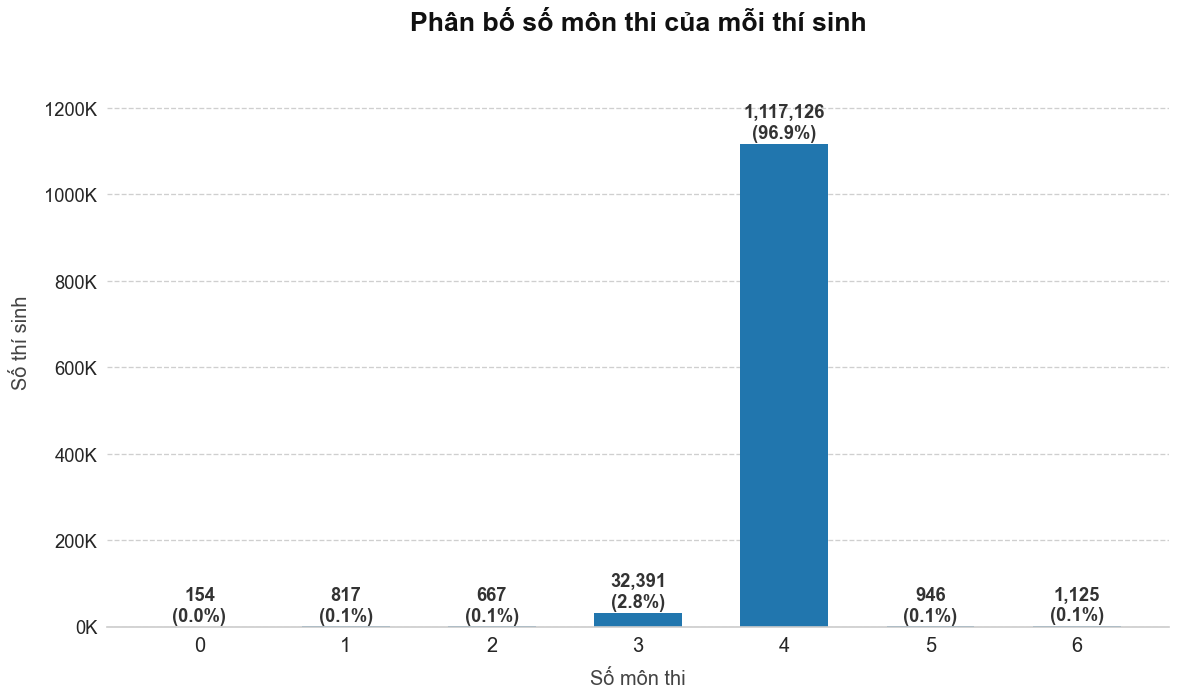

Saved: dist/charts/num_subjects_bar.png


In [13]:

df = pd.read_parquet('combined_data.parquet')

score_cols = ['toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc',
              'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep',
              'su', 'dia', 'giao_duc_kinh_te_va_phap_luat',
              'ngoai_ngu', 'giao_duc_cong_dan']

df['num_subjects'] = df[score_cols].notna().sum(axis=1)

# ==============================
# Bar chart – Phân bố số môn thi
# ==============================
num_subj_counts = df['num_subjects'].value_counts().sort_index()
total_students  = num_subj_counts.sum()

BAR_COLOR = "#2176AE"

with plt.style.context("seaborn-v0_8-whitegrid"):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    bars = ax.bar(
        num_subj_counts.index.astype(str),
        num_subj_counts.values,
        color=BAR_COLOR,
        edgecolor="none",
        width=0.6
    )

    # ── Data labels trên đầu cột ──
    for bar, val in zip(bars, num_subj_counts.values):
        pct = val / total_students * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + total_students * 0.003,
            f"{val:,}\n({pct:.1f}%)",
            ha="center", va="bottom", fontsize=11, fontweight="bold", color="#333333"
        )

    # ── Grid dashed mờ ──
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color="#BBBBBB", linestyle="--", linewidth=0.8, alpha=0.7)
    ax.xaxis.grid(False)

    # ── Trục & nhãn ──
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1000:.0f}K"))
    ax.tick_params(axis="x", labelsize=12, length=0, pad=6)
    ax.tick_params(axis="y", labelsize=11, length=0, pad=6)
    ax.set_ylim(top=max(num_subj_counts.values) * 1.18)

    ax.set_title("Phân bố số môn thi của mỗi thí sinh",
                 fontsize=16, fontweight="bold", pad=16, color="#111111")
    ax.set_xlabel("Số môn thi", fontsize=12, labelpad=8, color="#444444")
    ax.set_ylabel("Số thí sinh",  fontsize=12, labelpad=8, color="#444444")

    # ── Chỉ giữ viền dưới (baseline) ──
    for side in ["top", "right", "left"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("#CCCCCC")

    plt.tight_layout()
    plt.savefig(f"{output_dir}/num_subjects_bar.png", dpi=120, bbox_inches="tight")
    plt.show()

print(f"Saved: {output_dir}/num_subjects_bar.png")


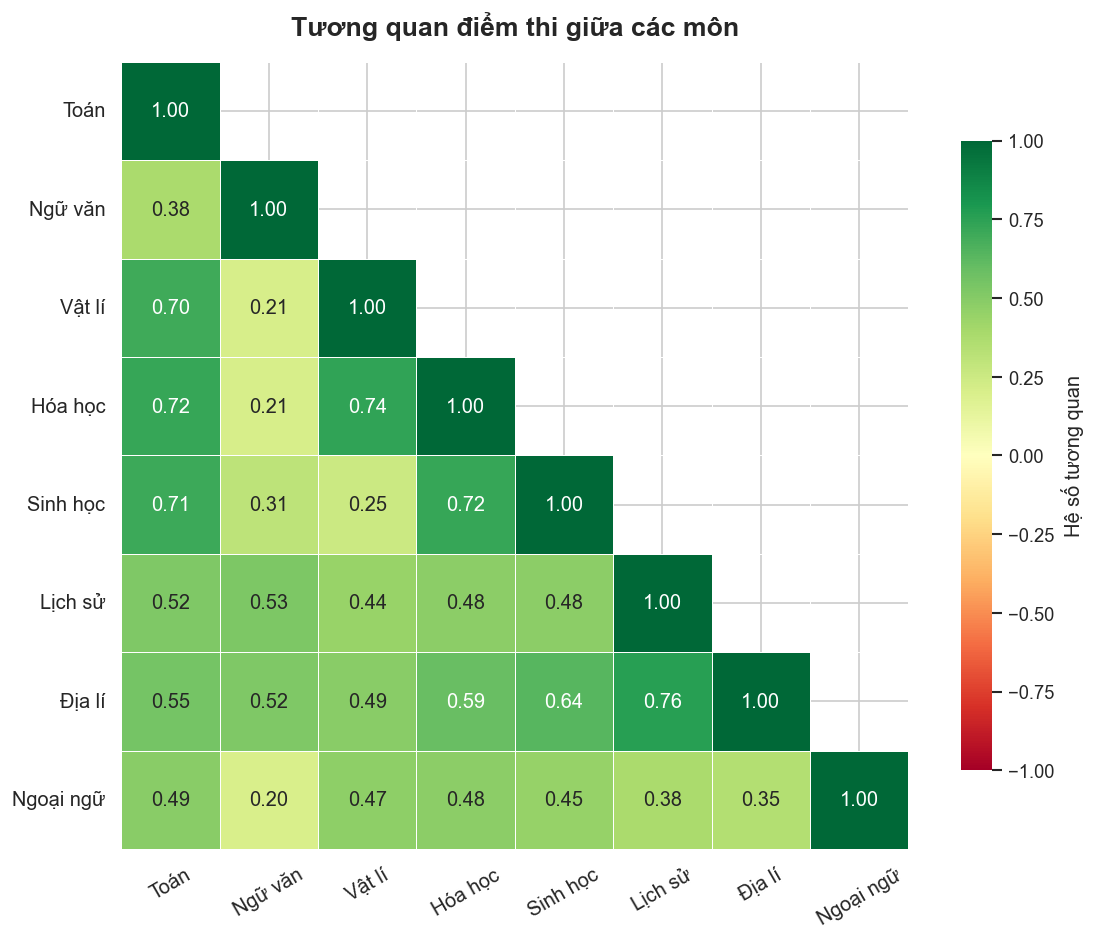

Saved: dist/charts/corr_heatmap.png


In [14]:

# ==============================
# 2. Heatmap – Tương quan giữa các môn thi
# ==============================
corr_cols = ['toan', 'van', 'li', 'hoa', 'sinh', 'su', 'dia', 'ngoai_ngu']

CORR_LABELS = {
    'toan': 'Toán',
    'van': 'Ngữ văn',
    'li': 'Vật lí',
    'hoa': 'Hóa học',
    'sinh': 'Sinh học',
    'su': 'Lịch sử',
    'dia': 'Địa lí',
    'ngoai_ngu': 'Ngoại ngữ',
}

corr_matrix = df[corr_cols].corr().round(2)
corr_matrix.index   = [CORR_LABELS[c] for c in corr_matrix.index]
corr_matrix.columns = [CORR_LABELS[c] for c in corr_matrix.columns]

fig, ax = plt.subplots(figsize=(10, 8))

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True   # ẩn tam giác trên (trừ đường chéo)

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 12},
    ax=ax,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"}
)

ax.set_title("Tương quan điểm thi giữa các môn", fontsize=16, fontweight="bold", pad=16)
ax.tick_params(axis='x', labelsize=12, rotation=30)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.tight_layout()
plt.savefig(f"{output_dir}/corr_heatmap.png", dpi=120, bbox_inches='tight')
plt.show()
print(f"Saved: {output_dir}/corr_heatmap.png")


In [15]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_parquet('combined_data.parquet')

# ==============================
# Tính mean & std điểm Toán theo tỉnh
# ==============================
toan_stats = (
    df.dropna(subset=['tinh', 'toan'])
    .groupby('tinh')['toan']
    .agg(mean_toan='mean', std_toan='std')
    .reset_index()
    .dropna()
)

print(f"Số tỉnh có dữ liệu Toán: {len(toan_stats)}")
print(toan_stats.sort_values('mean_toan', ascending=False).to_string(index=False))


Số tỉnh có dữ liệu Toán: 63
             tinh  mean_toan  std_toan
         Nam Định   5.655661  1.680954
        Vĩnh Phúc   5.467271  1.780927
       Bình Dương   5.410281  1.477749
           Hà Nội   5.291549  1.793789
  TP. Hồ Chí Minh   5.260874  1.532779
        Hải Phòng   5.209107  1.750118
         Bắc Ninh   5.206576  1.831591
           Hà Nam   5.195609  1.736520
        Thái Bình   5.188304  1.722166
          Đà Nẵng   5.187336  1.706839
        Ninh Bình   5.175233  1.746950
Bà Rịa - Vũng Tàu   5.117712  1.444375
        Hải Dương   5.040947  1.765107
   Thừa Thiên Huế   4.897884  1.684836
          Hà Tĩnh   4.873173  1.708079
          Nghệ An   4.848056  1.753537
       Tiền Giang   4.841449  1.400112
          Phú Thọ   4.834077  1.659469
         Hưng Yên   4.818801  1.753768
       Quảng Ngãi   4.771898  1.610380
        Bắc Giang   4.743418  1.745581
          Long An   4.741054  1.353315
        Khánh Hòa   4.715272  1.639523
        Bình Định   4.704812  1.5695

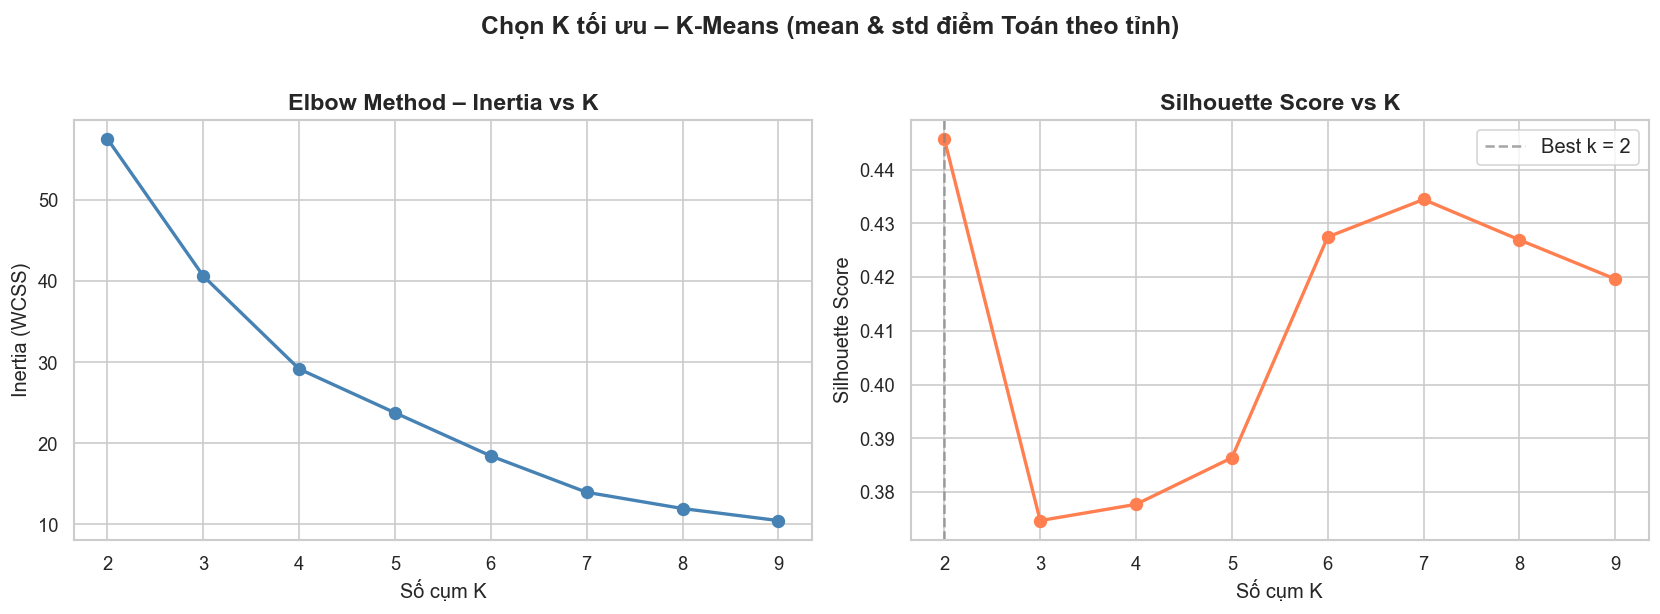

K tối ưu theo Silhouette: 2


In [16]:

# ==============================
# Chuẩn hoá và chọn k tối ưu (Elbow + Silhouette) – Toán theo tỉnh gốc
# ==============================
X = toan_stats[['mean_toan', 'std_toan']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K_range = range(2, 10)
inertias, sil_scores = [], []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(list(K_range), inertias, 'o-', color='steelblue', linewidth=2, markersize=7)
axes[0].set_title("Elbow Method – Inertia vs K", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Số cụm K", fontsize=12)
axes[0].set_ylabel("Inertia (WCSS)", fontsize=12)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

best_k = list(K_range)[np.argmax(sil_scores)]
axes[1].plot(list(K_range), sil_scores, 'o-', color='coral', linewidth=2, markersize=7)
axes[1].axvline(best_k, linestyle='--', color='gray', alpha=0.7, label=f'Best k = {best_k}')
axes[1].set_title("Silhouette Score vs K", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Số cụm K", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1].legend(fontsize=12)

plt.suptitle("Chọn K tối ưu – K-Means (mean & std điểm Toán theo tỉnh)",
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_optimal_k.png", dpi=120, bbox_inches='tight')
plt.show()
print(f"K tối ưu theo Silhouette: {best_k}")


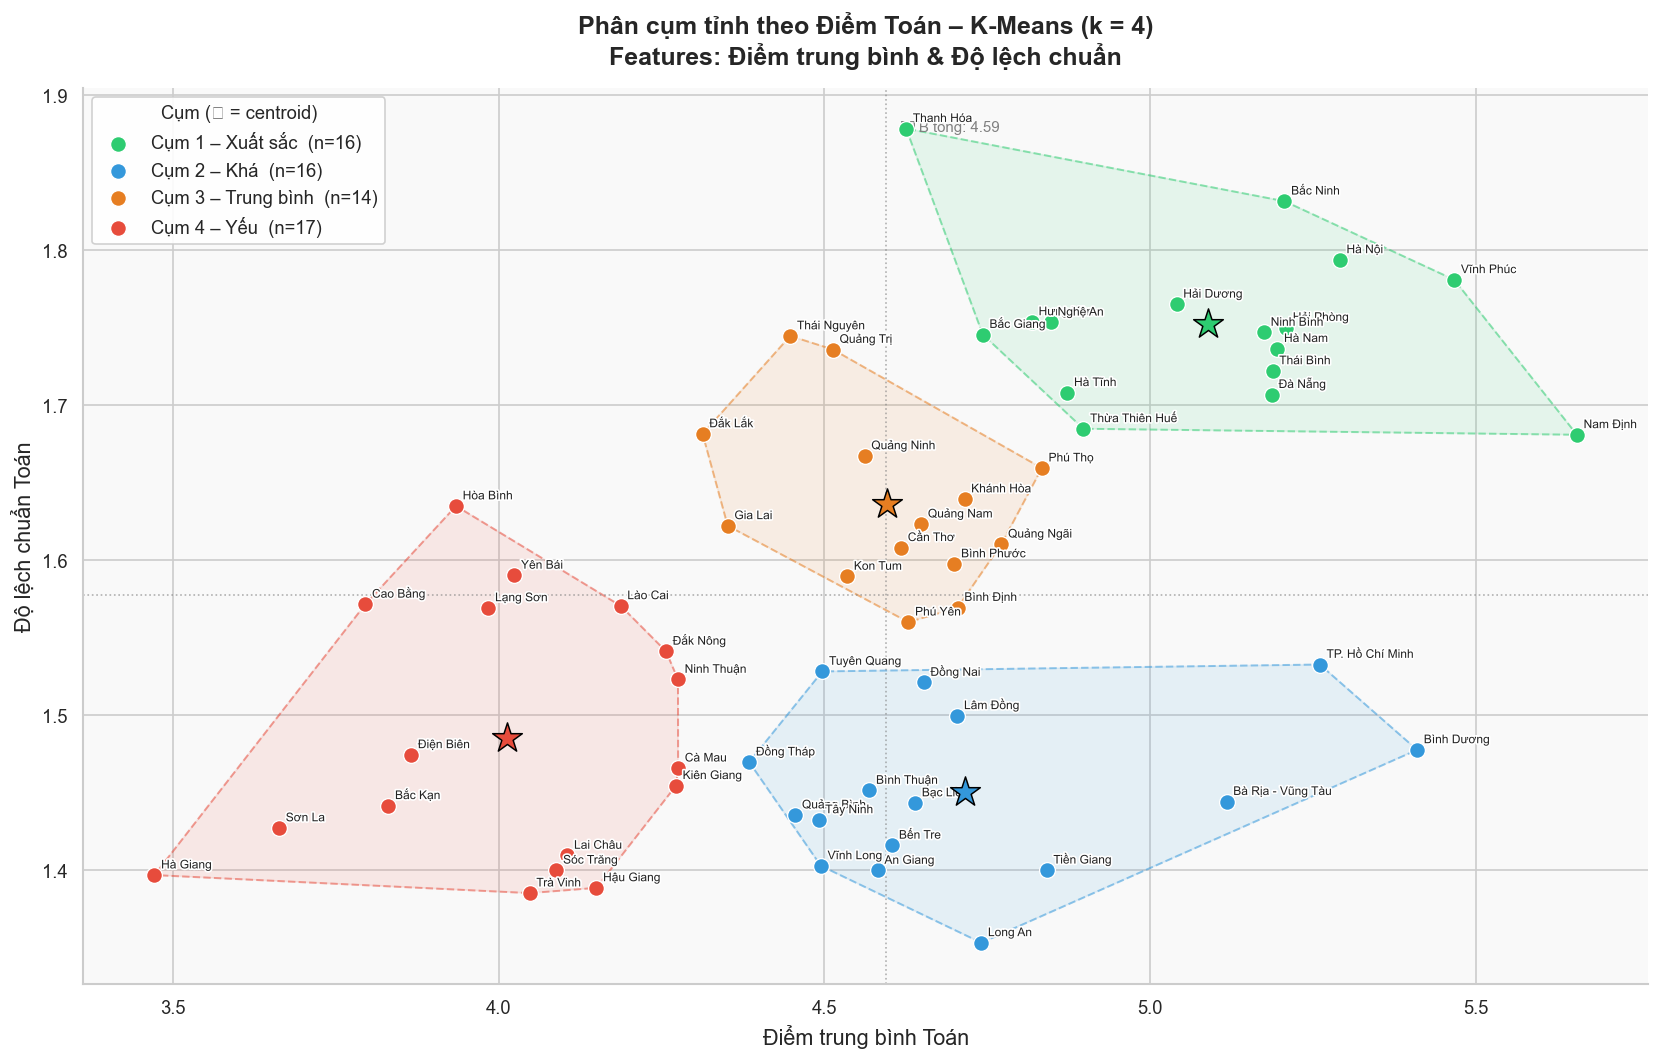

Saved: dist/charts/kmeans_k4_2d.png

=== THÀNH PHẦN CÁC CỤM (TOÁN) ===

[Cụm 1] Cụm 1 – Xuất sắc — 16 tỉnh
  ĐTB Toán: 5.089  |  Std Toán: 1.752
  Tỉnh: Nam Định, Vĩnh Phúc, Hà Nội, Hải Phòng, Bắc Ninh, Hà Nam, Thái Bình, Đà Nẵng, Ninh Bình, Hải Dương, Thừa Thiên Huế, Hà Tĩnh, Nghệ An, Hưng Yên, Bắc Giang, Thanh Hóa

[Cụm 2] Cụm 2 – Khá — 16 tỉnh
  ĐTB Toán: 4.715  |  Std Toán: 1.451
  Tỉnh: Bình Dương, TP. Hồ Chí Minh, Bà Rịa - Vũng Tàu, Tiền Giang, Long An, Lâm Đồng, Đồng Nai, Bạc Liêu, Bến Tre, An Giang, Bình Thuận, Tuyên Quang, Vĩnh Long, Tây Ninh, Quảng Bình, Đồng Tháp

[Cụm 3] Cụm 3 – Trung bình — 14 tỉnh
  ĐTB Toán: 4.596  |  Std Toán: 1.636
  Tỉnh: Phú Thọ, Quảng Ngãi, Khánh Hòa, Bình Định, Bình Phước, Quảng Nam, Phú Yên, Cần Thơ, Quảng Ninh, Kon Tum, Quảng Trị, Thái Nguyên, Gia Lai, Đắk Lắk

[Cụm 4] Cụm 4 – Yếu — 17 tỉnh
  ĐTB Toán: 4.013  |  Std Toán: 1.485
  Tỉnh: Cà Mau, Ninh Thuận, Kiên Giang, Đắk Nông, Lào Cai, Hậu Giang, Lai Châu, Sóc Trăng, Trà Vinh, Yên Bái, Lạng Sơn, 

In [17]:

# ==============================
# Phân cụm K-Means k=4 + biểu đồ 2D – Điểm Toán theo tỉnh
# Silhouette tốt nhất = 2, nhưng Elbow gãy rõ ở k=4 → dùng k=4 để phân tích chi tiết hơn
# ==============================
from scipy.spatial import ConvexHull
import matplotlib.patheffects as pe
import warnings
warnings.filterwarnings('ignore')

K_OPTIMAL = 4
CLUSTER_COLORS = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']
CLUSTER_LABELS = {
    0: "Cụm 1 – Xuất sắc",
    1: "Cụm 2 – Khá",
    2: "Cụm 3 – Trung bình",
    3: "Cụm 4 – Yếu",
}

km_final = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init=10)
toan_stats['cluster'] = km_final.fit_predict(X_scaled)

cluster_order = (
    toan_stats.groupby('cluster')['mean_toan'].mean()
    .sort_values(ascending=False).index.tolist()
)
rank_map = {c: i for i, c in enumerate(cluster_order)}
toan_stats['cluster_rank'] = toan_stats['cluster'].map(rank_map)
toan_stats['label'] = toan_stats['cluster_rank'].map(CLUSTER_LABELS)

# ---- Biểu đồ 2D ----
fig, ax = plt.subplots(figsize=(14, 9))
ax.set_facecolor('#f9f9f9')

for rank in range(K_OPTIMAL):
    sub = toan_stats[toan_stats['cluster_rank'] == rank]
    pts = sub[['mean_toan', 'std_toan']].values
    color = CLUSTER_COLORS[rank]
    if len(pts) >= 3:
        hull = ConvexHull(pts)
        hull_pts = np.append(hull.vertices, hull.vertices[0])
        ax.fill(pts[hull_pts, 0], pts[hull_pts, 1], alpha=0.10, color=color, zorder=1)
        ax.plot(pts[hull_pts, 0], pts[hull_pts, 1],
                linestyle='--', linewidth=1.2, color=color, alpha=0.5, zorder=2)

for rank in range(K_OPTIMAL):
    sub = toan_stats[toan_stats['cluster_rank'] == rank]
    ax.scatter(
        sub['mean_toan'], sub['std_toan'],
        label=f"{CLUSTER_LABELS[rank]}  (n={len(sub)})",
        color=CLUSTER_COLORS[rank],
        s=90, edgecolors='white', linewidths=0.8, zorder=4
    )

for _, row in toan_stats.iterrows():
    ax.annotate(
        row['tinh'],
        xy=(row['mean_toan'], row['std_toan']),
        xytext=(4, 4), textcoords='offset points',
        fontsize=7.2, color='#222222',
        path_effects=[pe.withStroke(linewidth=2, foreground='white')],
        zorder=5
    )

centers_orig = scaler.inverse_transform(km_final.cluster_centers_)
for i, center in enumerate(centers_orig):
    cr = rank_map[i]
    ax.scatter(center[0], center[1],
               marker='*', s=350, color=CLUSTER_COLORS[cr],
               edgecolors='black', linewidths=0.9, zorder=6)

grand_mean = toan_stats['mean_toan'].mean()
grand_std  = toan_stats['std_toan'].mean()
ax.axvline(grand_mean, color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.axhline(grand_std,  color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.text(grand_mean + 0.02, ax.get_ylim()[1] * 0.99,
        f'ĐTB tổng: {grand_mean:.2f}', fontsize=9, color='gray', va='top')

ax.set_title(
    "Phân cụm tỉnh theo Điểm Toán – K-Means (k = 4)\n"
    "Features: Điểm trung bình & Độ lệch chuẩn",
    fontsize=15, fontweight='bold', pad=14
)
ax.set_xlabel("Điểm trung bình Toán", fontsize=13)
ax.set_ylabel("Độ lệch chuẩn Toán", fontsize=13)
ax.tick_params(labelsize=11)
ax.legend(fontsize=11, title="Cụm (★ = centroid)", title_fontsize=11,
          framealpha=0.9, loc='upper left')
sns.despine()
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_k4_2d.png", dpi=130, bbox_inches='tight')
plt.show()
print(f"Saved: {output_dir}/kmeans_k4_2d.png")

# ---- Bảng tổng hợp ----
print("\n=== THÀNH PHẦN CÁC CỤM (TOÁN) ===")
for rank in range(K_OPTIMAL):
    subset = toan_stats[toan_stats['cluster_rank'] == rank].sort_values('mean_toan', ascending=False)
    print(f"\n[Cụm {rank+1}] {CLUSTER_LABELS[rank]} — {len(subset)} tỉnh")
    print(f"  ĐTB Toán: {subset['mean_toan'].mean():.3f}  |  Std Toán: {subset['std_toan'].mean():.3f}")
    print(f"  Tỉnh: {', '.join(subset['tinh'].tolist())}")


Số tỉnh/thành mới: 34


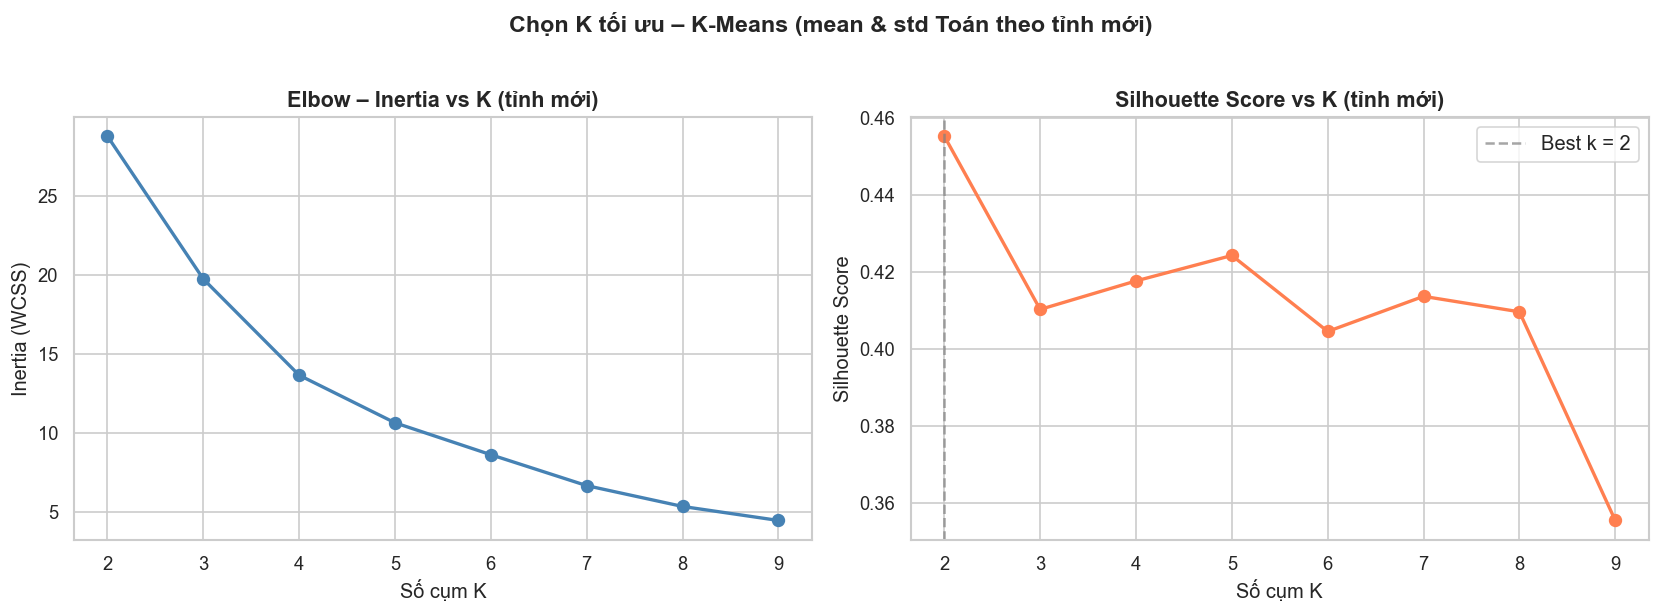

K tối ưu theo Silhouette (tỉnh mới): 2


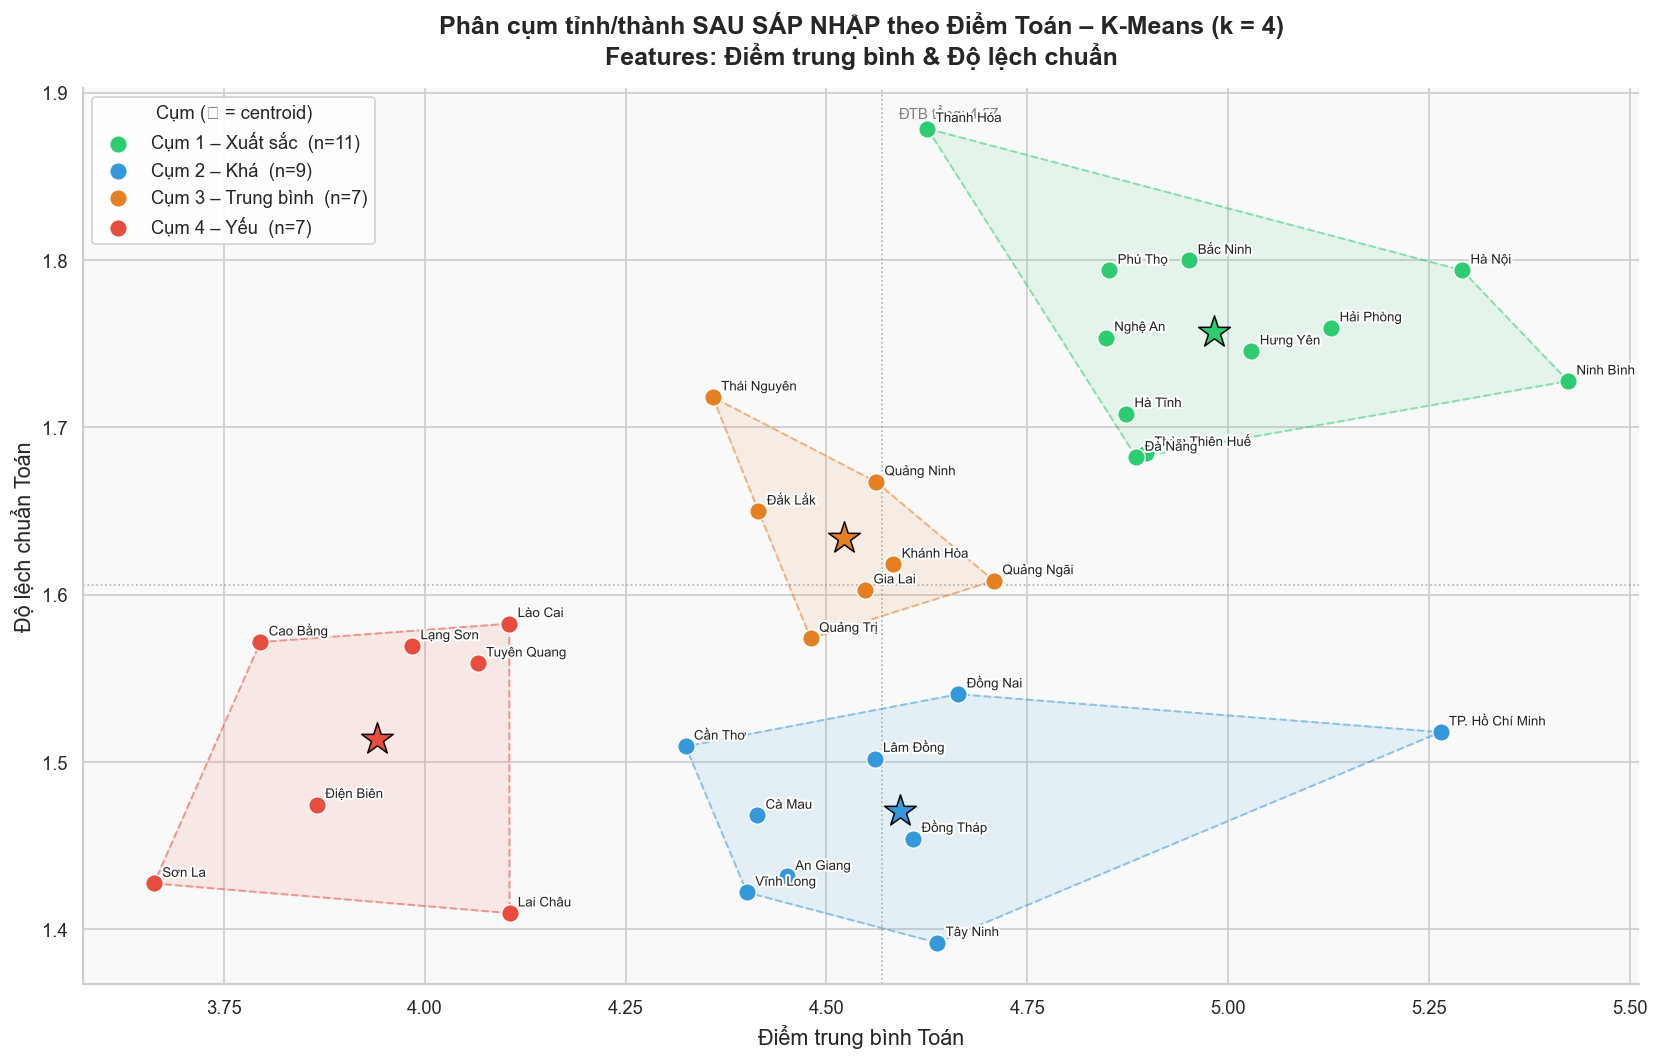

Saved: dist/charts/kmeans_moi_k4_2d.png

=== THÀNH PHẦN CÁC CỤM (TỈNH MỚI) ===

[Cụm 1] Cụm 1 – Xuất sắc — 11 tỉnh/thành
  ĐTB Toán: 4.983  |  Std TB: 1.757
  Tỉnh: Ninh Bình, Hà Nội, Hải Phòng, Hưng Yên, Bắc Ninh, Thừa Thiên Huế, Đà Nẵng, Hà Tĩnh, Phú Thọ, Nghệ An, Thanh Hóa

[Cụm 2] Cụm 2 – Khá — 9 tỉnh/thành
  ĐTB Toán: 4.592  |  Std TB: 1.471
  Tỉnh: TP. Hồ Chí Minh, Đồng Nai, Tây Ninh, Đồng Tháp, Lâm Đồng, An Giang, Cà Mau, Vĩnh Long, Cần Thơ

[Cụm 3] Cụm 3 – Trung bình — 7 tỉnh/thành
  ĐTB Toán: 4.522  |  Std TB: 1.634
  Tỉnh: Quảng Ngãi, Khánh Hòa, Quảng Ninh, Gia Lai, Quảng Trị, Đắk Lắk, Thái Nguyên

[Cụm 4] Cụm 4 – Yếu — 7 tỉnh/thành
  ĐTB Toán: 3.941  |  Std TB: 1.513
  Tỉnh: Lai Châu, Lào Cai, Tuyên Quang, Lạng Sơn, Điện Biên, Cao Bằng, Sơn La


In [18]:

# ==============================
# K-Means theo tinh_moi (sau sáp nhập) – mean & std điểm Toán
# Elbow + Silhouette → chọn K → k=4 scatter 2D
# ==============================
df = pd.read_parquet('combined_data.parquet')

toan_moi = (
    df.dropna(subset=['tinh_moi', 'toan'])
    .groupby('tinh_moi')['toan']
    .agg(mean_toan='mean', std_toan='std')
    .reset_index()
    .dropna()
)
print(f"Số tỉnh/thành mới: {len(toan_moi)}")

X_moi = toan_moi[['mean_toan', 'std_toan']].values
scaler_moi = StandardScaler()
X_moi_scaled = scaler_moi.fit_transform(X_moi)

# -- Elbow + Silhouette để chọn K --
K_range_moi = range(2, min(len(toan_moi), 10))
inertias_moi, sil_moi = [], []
for k in K_range_moi:
    km_ = KMeans(n_clusters=k, random_state=42, n_init=10)
    lbl_ = km_.fit_predict(X_moi_scaled)
    inertias_moi.append(km_.inertia_)
    sil_moi.append(silhouette_score(X_moi_scaled, lbl_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(list(K_range_moi), inertias_moi, 'o-', color='steelblue', linewidth=2, markersize=7)
axes[0].set_title("Elbow – Inertia vs K (tỉnh mới)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Số cụm K"); axes[0].set_ylabel("Inertia (WCSS)")
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

best_k_moi = list(K_range_moi)[np.argmax(sil_moi)]
axes[1].plot(list(K_range_moi), sil_moi, 'o-', color='coral', linewidth=2, markersize=7)
axes[1].axvline(best_k_moi, linestyle='--', color='gray', alpha=0.7, label=f'Best k = {best_k_moi}')
axes[1].set_title("Silhouette Score vs K (tỉnh mới)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Số cụm K"); axes[1].set_ylabel("Silhouette Score")
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1].legend(fontsize=12)

plt.suptitle("Chọn K tối ưu – K-Means (mean & std Toán theo tỉnh mới)",
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_moi_optimal_k.png", dpi=120, bbox_inches='tight')
plt.show()
print(f"K tối ưu theo Silhouette (tỉnh mới): {best_k_moi}")

# -- Fit K=4 + biểu đồ 2D --
K_MOI = 4
CLUSTER_COLORS_MOI = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']
CLUSTER_LABELS_MOI = {
    0: "Cụm 1 – Xuất sắc",
    1: "Cụm 2 – Khá",
    2: "Cụm 3 – Trung bình",
    3: "Cụm 4 – Yếu",
}

km_moi = KMeans(n_clusters=K_MOI, random_state=42, n_init=10)
toan_moi['cluster'] = km_moi.fit_predict(X_moi_scaled)

cluster_order_moi = (
    toan_moi.groupby('cluster')['mean_toan'].mean()
    .sort_values(ascending=False).index.tolist()
)
rank_map_moi = {c: i for i, c in enumerate(cluster_order_moi)}
toan_moi['cluster_rank'] = toan_moi['cluster'].map(rank_map_moi)

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_facecolor('#f9f9f9')

for rank in range(K_MOI):
    sub = toan_moi[toan_moi['cluster_rank'] == rank]
    pts = sub[['mean_toan', 'std_toan']].values
    color = CLUSTER_COLORS_MOI[rank]
    if len(pts) >= 3:
        hull = ConvexHull(pts)
        hull_pts = np.append(hull.vertices, hull.vertices[0])
        ax.fill(pts[hull_pts, 0], pts[hull_pts, 1], alpha=0.10, color=color, zorder=1)
        ax.plot(pts[hull_pts, 0], pts[hull_pts, 1],
                linestyle='--', linewidth=1.2, color=color, alpha=0.5, zorder=2)

for rank in range(K_MOI):
    sub = toan_moi[toan_moi['cluster_rank'] == rank]
    ax.scatter(
        sub['mean_toan'], sub['std_toan'],
        label=f"{CLUSTER_LABELS_MOI[rank]}  (n={len(sub)})",
        color=CLUSTER_COLORS_MOI[rank],
        s=110, edgecolors='white', linewidths=0.8, zorder=4
    )

for _, row in toan_moi.iterrows():
    ax.annotate(
        row['tinh_moi'],
        xy=(row['mean_toan'], row['std_toan']),
        xytext=(5, 4), textcoords='offset points',
        fontsize=8, color='#222222',
        path_effects=[pe.withStroke(linewidth=2.5, foreground='white')],
        zorder=5
    )

centers_moi = scaler_moi.inverse_transform(km_moi.cluster_centers_)
for i, center in enumerate(centers_moi):
    cr = rank_map_moi[i]
    ax.scatter(center[0], center[1],
               marker='*', s=400, color=CLUSTER_COLORS_MOI[cr],
               edgecolors='black', linewidths=0.9, zorder=6)

grand_mean_moi = toan_moi['mean_toan'].mean()
grand_std_moi  = toan_moi['std_toan'].mean()
ax.axvline(grand_mean_moi, color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.axhline(grand_std_moi,  color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.text(grand_mean_moi + 0.02, ax.get_ylim()[1] * 0.995,
        f'ĐTB tổng: {grand_mean_moi:.2f}', fontsize=9, color='gray', va='top')

ax.set_title(
    "Phân cụm tỉnh/thành SAU SÁP NHẬP theo Điểm Toán – K-Means (k = 4)\n"
    "Features: Điểm trung bình & Độ lệch chuẩn",
    fontsize=15, fontweight='bold', pad=14
)
ax.set_xlabel("Điểm trung bình Toán", fontsize=13)
ax.set_ylabel("Độ lệch chuẩn Toán", fontsize=13)
ax.tick_params(labelsize=11)
ax.legend(fontsize=11, title="Cụm (★ = centroid)", title_fontsize=11,
          framealpha=0.9, loc='upper left')
sns.despine()
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_moi_k4_2d.png", dpi=130, bbox_inches='tight')
plt.show()
print(f"Saved: {output_dir}/kmeans_moi_k4_2d.png")

print("\n=== THÀNH PHẦN CÁC CỤM (TỈNH MỚI) ===")
for rank in range(K_MOI):
    sub = toan_moi[toan_moi['cluster_rank'] == rank].sort_values('mean_toan', ascending=False)
    print(f"\n[Cụm {rank+1}] {CLUSTER_LABELS_MOI[rank]} — {len(sub)} tỉnh/thành")
    print(f"  ĐTB Toán: {sub['mean_toan'].mean():.3f}  |  Std TB: {sub['std_toan'].mean():.3f}")
    print(f"  Tỉnh: {', '.join(sub['tinh_moi'].tolist())}")


In [19]:

# ==============================
# Helper: K-Means k=4 + biểu đồ 2D cho bất kỳ môn thi đơn lẻ
# ==============================
from scipy.spatial import ConvexHull
import matplotlib.patheffects as pe
import warnings
warnings.filterwarnings('ignore')

CLUSTER_COLORS = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']

def kmeans_subject_2d(df, subject_col, subject_label, k=4, group_col='tinh'):
    """
    Phân cụm K-Means (Elbow + Silhouette + scatter 2D) theo mean & std của một môn thi.
    Lưu kết quả vào:
      charts/kmeans_{subject_col}_optimal_k.png
      charts/kmeans_{subject_col}_k{k}_2d.png
    """
    # --- Tính mean & std ---
    stats = (
        df.dropna(subset=[group_col, subject_col])
        .groupby(group_col)[subject_col]
        .agg(**{f'mean_{subject_col}': 'mean', f'std_{subject_col}': 'std'})
        .reset_index()
        .dropna()
    )
    mean_col = f'mean_{subject_col}'
    std_col  = f'std_{subject_col}'
    print(f"Số tỉnh có dữ liệu {subject_label}: {len(stats)}")

    X = stats[[mean_col, std_col]].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- Elbow + Silhouette ---
    K_range = range(2, 10)
    inertias, sil_scores = [], []
    for kk in K_range:
        km_ = KMeans(n_clusters=kk, random_state=42, n_init=10)
        lbl_ = km_.fit_predict(X_scaled)
        inertias.append(km_.inertia_)
        sil_scores.append(silhouette_score(X_scaled, lbl_))

    best_k_sil = list(K_range)[np.argmax(sil_scores)]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].plot(list(K_range), inertias, 'o-', color='steelblue', linewidth=2, markersize=7)
    axes[0].set_title(f"Elbow – Inertia vs K ({subject_label})", fontsize=13, fontweight='bold')
    axes[0].set_xlabel("Số cụm K"); axes[0].set_ylabel("Inertia (WCSS)")
    axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    axes[1].plot(list(K_range), sil_scores, 'o-', color='coral', linewidth=2, markersize=7)
    axes[1].axvline(best_k_sil, linestyle='--', color='gray', alpha=0.7, label=f'Best k = {best_k_sil}')
    axes[1].set_title(f"Silhouette Score vs K ({subject_label})", fontsize=13, fontweight='bold')
    axes[1].set_xlabel("Số cụm K"); axes[1].set_ylabel("Silhouette Score")
    axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axes[1].legend(fontsize=12)

    plt.suptitle(f"Chọn K tối ưu – K-Means (mean & std {subject_label} theo tỉnh)",
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/kmeans_{subject_col}_optimal_k.png", dpi=120, bbox_inches='tight')
    plt.show()
    print(f"K tối ưu theo Silhouette ({subject_label}): {best_k_sil}")

    # --- Fit K=k ---
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    stats['cluster'] = km.fit_predict(X_scaled)

    cluster_order = (
        stats.groupby('cluster')[mean_col].mean()
        .sort_values(ascending=False).index.tolist()
    )
    rank_map = {c: i for i, c in enumerate(cluster_order)}
    stats['cluster_rank'] = stats['cluster'].map(rank_map)

    CLUSTER_LABELS = {
        0: "Cụm 1 – Xuất sắc",
        1: "Cụm 2 – Khá",
        2: "Cụm 3 – Trung bình",
        3: "Cụm 4 – Yếu",
    }

    # --- Biểu đồ 2D ---
    fig, ax = plt.subplots(figsize=(14, 9))
    ax.set_facecolor('#f9f9f9')

    for rank in range(k):
        sub = stats[stats['cluster_rank'] == rank]
        pts = sub[[mean_col, std_col]].values
        color = CLUSTER_COLORS[rank]
        if len(pts) >= 3:
            hull = ConvexHull(pts)
            hull_pts = np.append(hull.vertices, hull.vertices[0])
            ax.fill(pts[hull_pts, 0], pts[hull_pts, 1], alpha=0.10, color=color, zorder=1)
            ax.plot(pts[hull_pts, 0], pts[hull_pts, 1],
                    linestyle='--', linewidth=1.2, color=color, alpha=0.5, zorder=2)

    for rank in range(k):
        sub = stats[stats['cluster_rank'] == rank]
        ax.scatter(sub[mean_col], sub[std_col],
                   label=f"{CLUSTER_LABELS[rank]}  (n={len(sub)})",
                   color=CLUSTER_COLORS[rank],
                   s=90, edgecolors='white', linewidths=0.8, zorder=4)

    for _, row in stats.iterrows():
        ax.annotate(
            row[group_col],
            xy=(row[mean_col], row[std_col]),
            xytext=(4, 4), textcoords='offset points',
            fontsize=7.2, color='#222222',
            path_effects=[pe.withStroke(linewidth=2, foreground='white')],
            zorder=5
        )

    centers = scaler.inverse_transform(km.cluster_centers_)
    for i, center in enumerate(centers):
        cr = rank_map[i]
        ax.scatter(center[0], center[1],
                   marker='*', s=350, color=CLUSTER_COLORS[cr],
                   edgecolors='black', linewidths=0.9, zorder=6)

    grand_mean = stats[mean_col].mean()
    grand_std  = stats[std_col].mean()
    ax.axvline(grand_mean, color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
    ax.axhline(grand_std,  color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
    ax.text(grand_mean + (stats[mean_col].max() - stats[mean_col].min()) * 0.01,
            ax.get_ylim()[1] * 0.995,
            f'ĐTB tổng: {grand_mean:.2f}', fontsize=9, color='gray', va='top')

    ax.set_title(
        f"Phân cụm tỉnh theo Điểm {subject_label} – K-Means (k = {k})\n"
        "Features: Điểm trung bình & Độ lệch chuẩn",
        fontsize=15, fontweight='bold', pad=14
    )
    ax.set_xlabel(f"Điểm trung bình {subject_label}", fontsize=13)
    ax.set_ylabel(f"Độ lệch chuẩn {subject_label}", fontsize=13)
    ax.tick_params(labelsize=11)
    ax.legend(fontsize=11, title="Cụm (★ = centroid)", title_fontsize=11,
              framealpha=0.9, loc='upper left')
    sns.despine()
    plt.tight_layout()
    save_path = f"{output_dir}/kmeans_{subject_col}_k{k}_2d.png"
    plt.savefig(save_path, dpi=130, bbox_inches='tight')
    plt.show()
    print(f"Saved: {save_path}")

    # --- Bảng tổng hợp ---
    print(f"\n=== THÀNH PHẦN CÁC CỤM ({subject_label.upper()}) ===")
    for rank in range(k):
        sub = stats[stats['cluster_rank'] == rank].sort_values(mean_col, ascending=False)
        print(f"\n[Cụm {rank+1}] {CLUSTER_LABELS[rank]} — {len(sub)} tỉnh")
        print(f"  ĐTB {subject_label}: {sub[mean_col].mean():.3f}  |  Std TB: {sub[std_col].mean():.3f}")
        print(f"  Tỉnh: {', '.join(sub[group_col].tolist())}")

    return stats


Số tỉnh có dữ liệu Ngữ Văn: 63


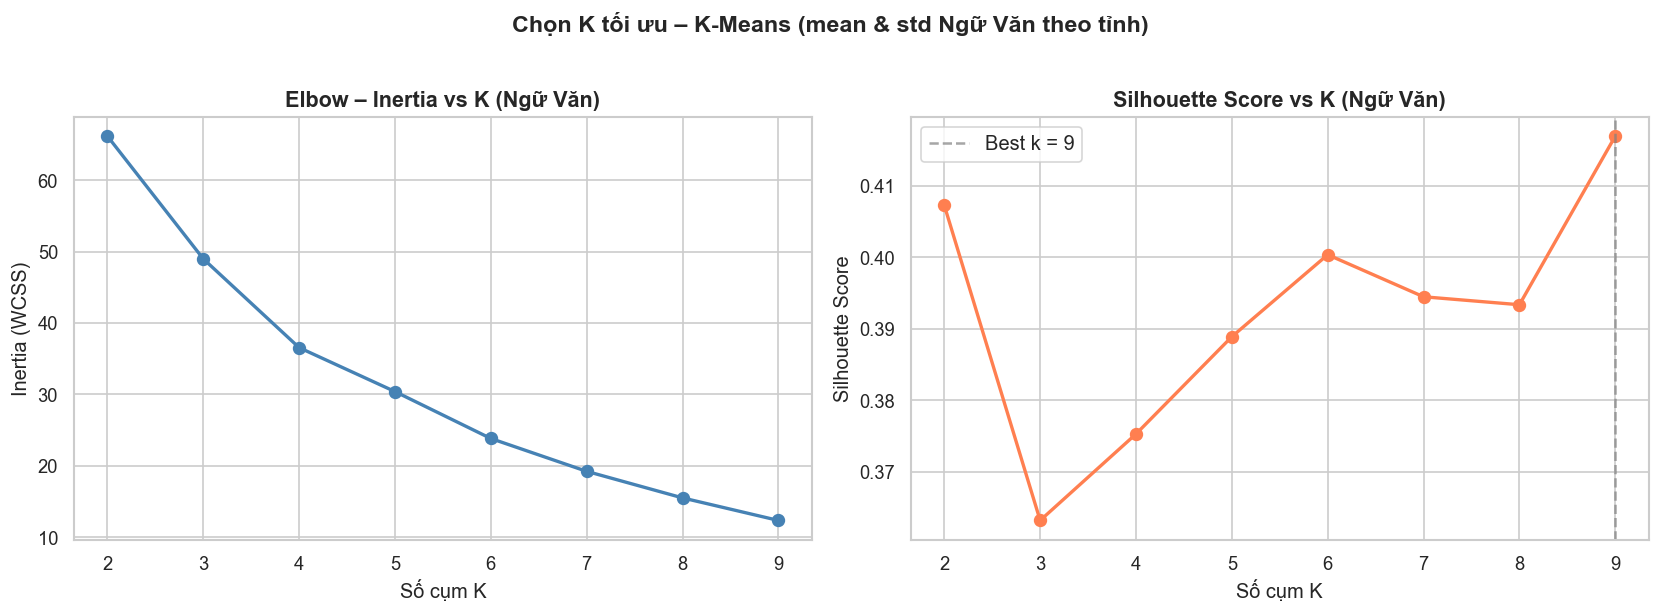

K tối ưu theo Silhouette (Ngữ Văn): 9


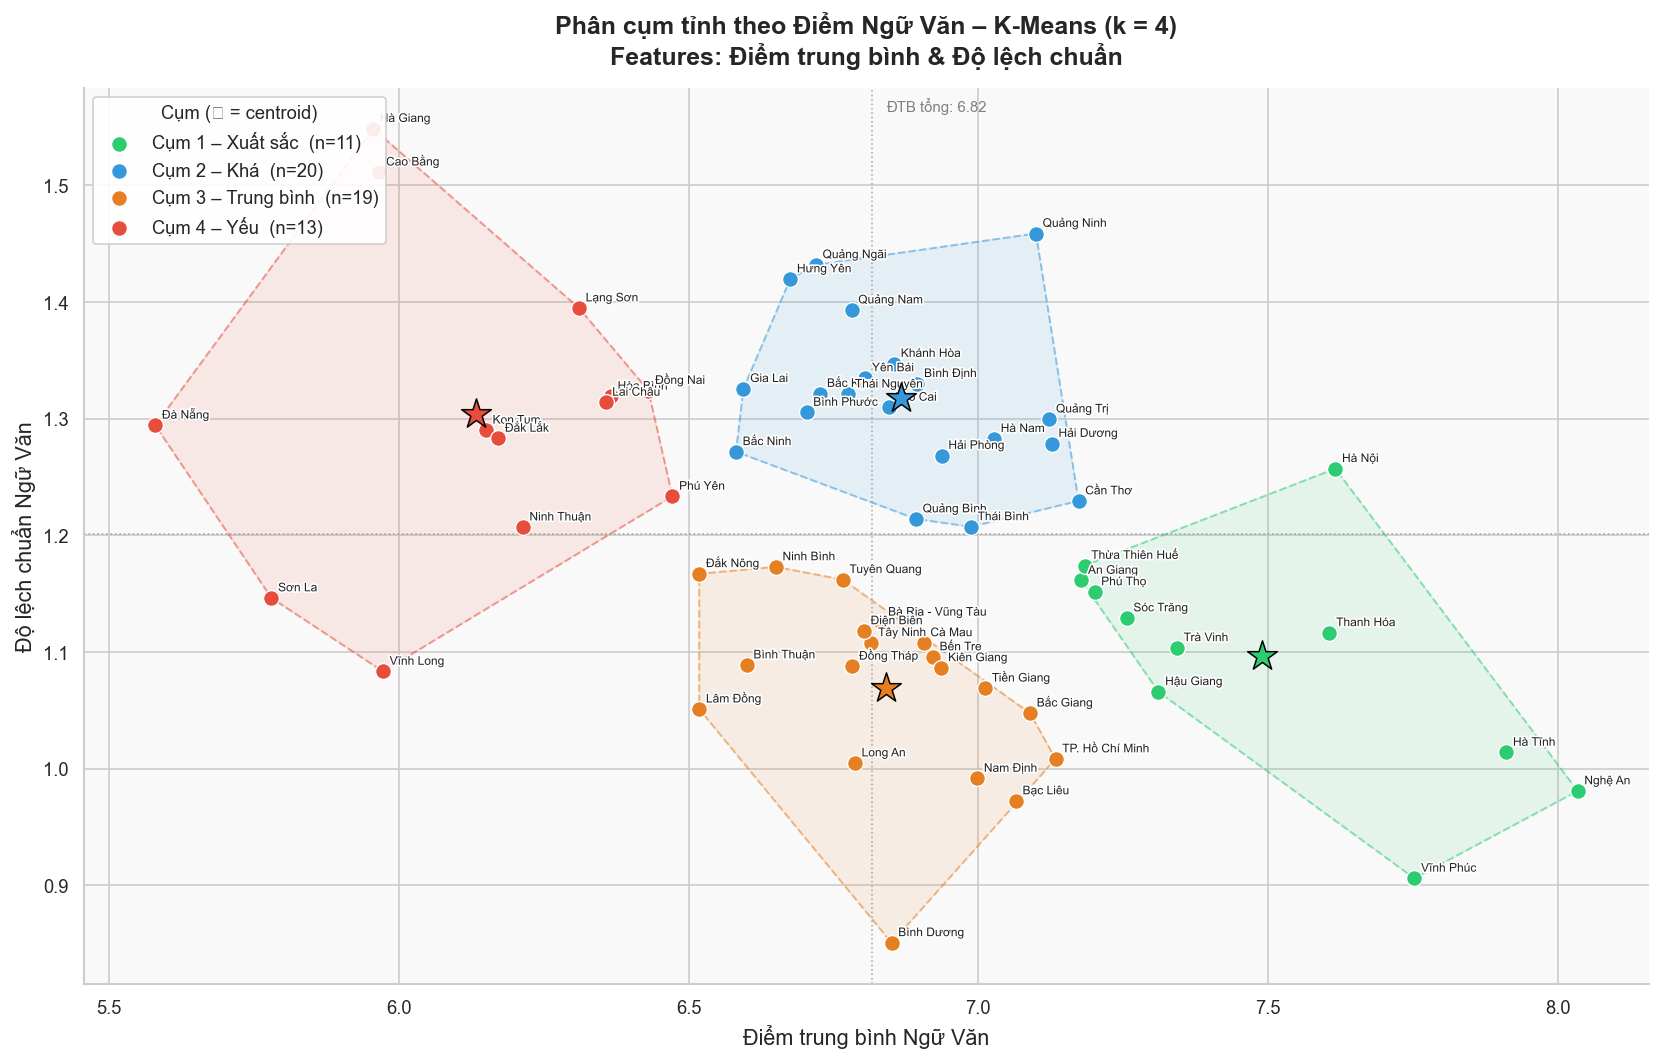

Saved: dist/charts/kmeans_van_k4_2d.png

=== THÀNH PHẦN CÁC CỤM (NGỮ VĂN) ===

[Cụm 1] Cụm 1 – Xuất sắc — 11 tỉnh
  ĐTB Ngữ Văn: 7.490  |  Std TB: 1.096
  Tỉnh: Nghệ An, Hà Tĩnh, Vĩnh Phúc, Hà Nội, Thanh Hóa, Trà Vinh, Hậu Giang, Sóc Trăng, Phú Thọ, Thừa Thiên Huế, An Giang

[Cụm 2] Cụm 2 – Khá — 20 tỉnh
  ĐTB Ngữ Văn: 6.866  |  Std TB: 1.317
  Tỉnh: Cần Thơ, Hải Dương, Quảng Trị, Quảng Ninh, Hà Nam, Thái Bình, Hải Phòng, Bình Định, Quảng Bình, Khánh Hòa, Lào Cai, Yên Bái, Quảng Nam, Thái Nguyên, Bắc Kạn, Quảng Ngãi, Bình Phước, Hưng Yên, Gia Lai, Bắc Ninh

[Cụm 3] Cụm 3 – Trung bình — 19 tỉnh
  ĐTB Ngữ Văn: 6.841  |  Std TB: 1.069
  Tỉnh: TP. Hồ Chí Minh, Bắc Giang, Bạc Liêu, Tiền Giang, Nam Định, Kiên Giang, Bến Tre, Cà Mau, Bình Dương, Bà Rịa - Vũng Tàu, Tây Ninh, Điện Biên, Long An, Đồng Tháp, Tuyên Quang, Ninh Bình, Bình Thuận, Lâm Đồng, Đắk Nông

[Cụm 4] Cụm 4 – Yếu — 13 tỉnh
  ĐTB Ngữ Văn: 6.133  |  Std TB: 1.304
  Tỉnh: Phú Yên, Đồng Nai, Hòa Bình, Lai Châu, Lạng Sơn, Ninh Thuậ

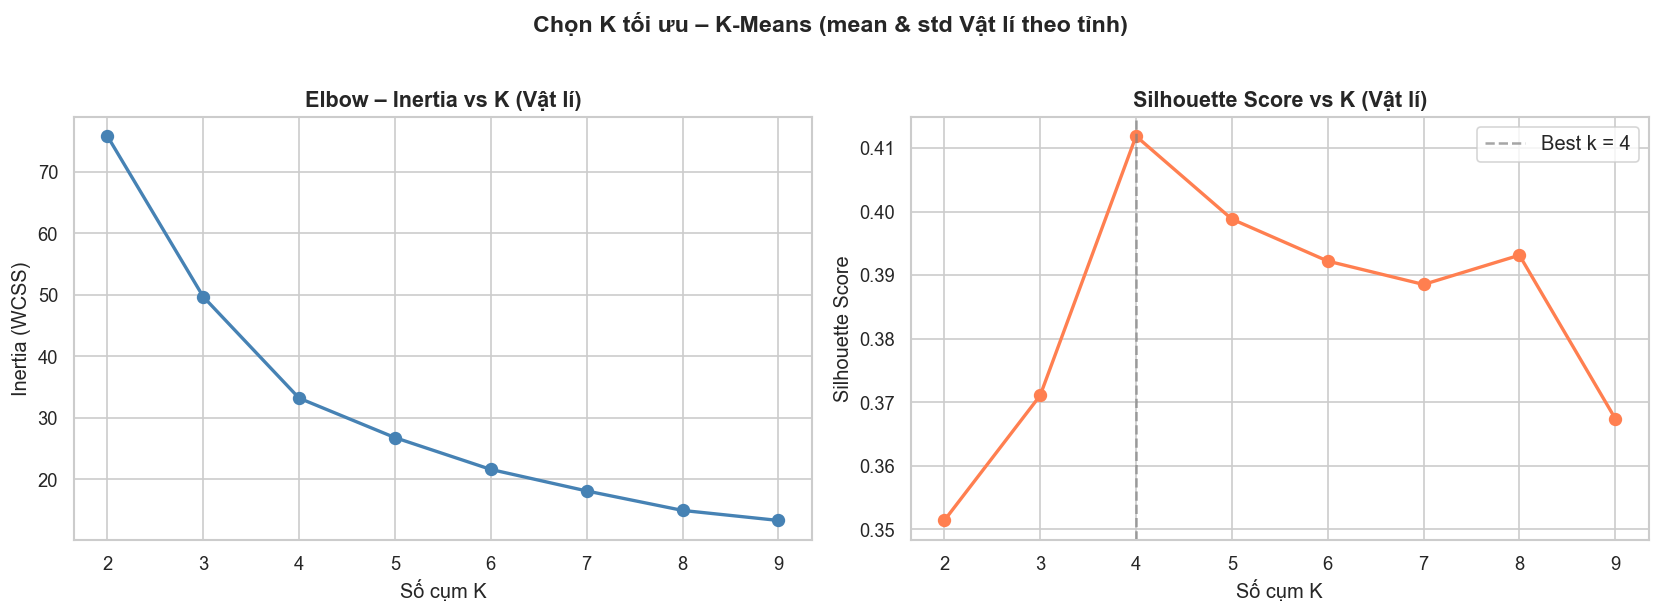

K tối ưu theo Silhouette (Vật lí): 4


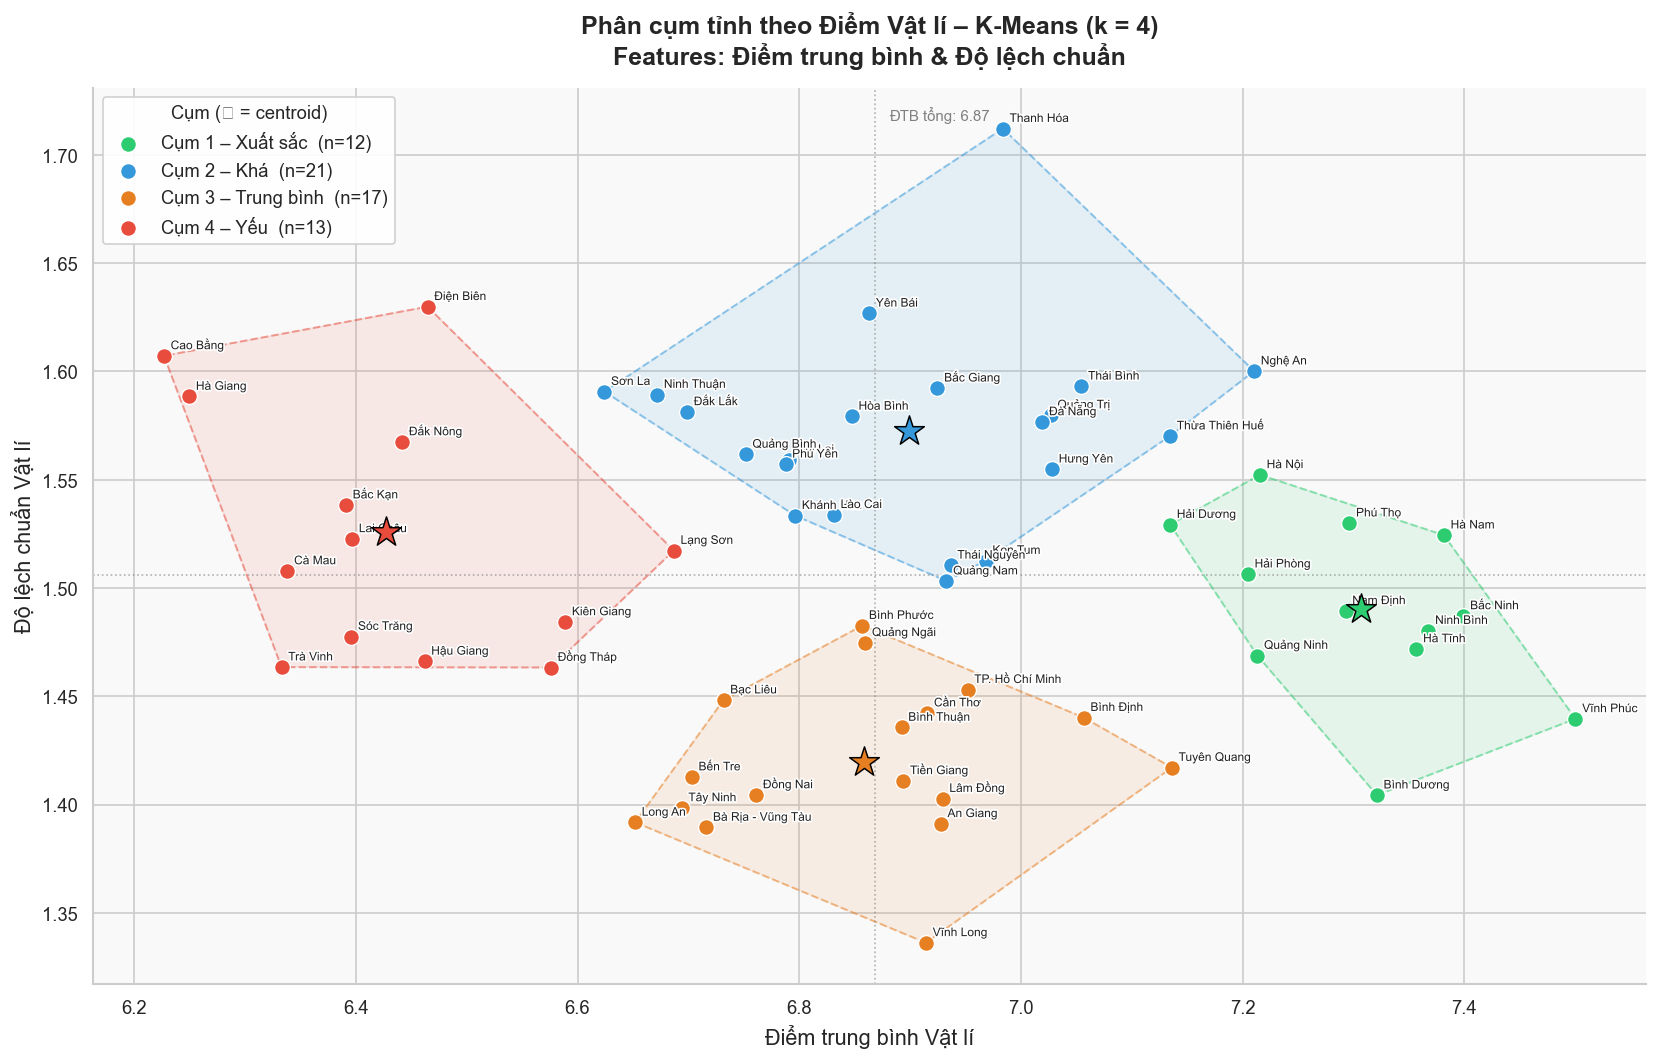

Saved: dist/charts/kmeans_li_k4_2d.png

=== THÀNH PHẦN CÁC CỤM (VẬT LÍ) ===

[Cụm 1] Cụm 1 – Xuất sắc — 12 tỉnh
  ĐTB Vật lí: 7.307  |  Std TB: 1.490
  Tỉnh: Vĩnh Phúc, Bắc Ninh, Hà Nam, Ninh Bình, Hà Tĩnh, Bình Dương, Phú Thọ, Nam Định, Hà Nội, Quảng Ninh, Hải Phòng, Hải Dương

[Cụm 2] Cụm 2 – Khá — 21 tỉnh
  ĐTB Vật lí: 6.899  |  Std TB: 1.572
  Tỉnh: Nghệ An, Thừa Thiên Huế, Thái Bình, Hưng Yên, Quảng Trị, Đà Nẵng, Thanh Hóa, Kon Tum, Thái Nguyên, Quảng Nam, Bắc Giang, Yên Bái, Hòa Bình, Lào Cai, Khánh Hòa, Gia Lai, Phú Yên, Quảng Bình, Đắk Lắk, Ninh Thuận, Sơn La

[Cụm 3] Cụm 3 – Trung bình — 17 tỉnh
  ĐTB Vật lí: 6.858  |  Std TB: 1.420
  Tỉnh: Tuyên Quang, Bình Định, TP. Hồ Chí Minh, Lâm Đồng, An Giang, Cần Thơ, Vĩnh Long, Tiền Giang, Bình Thuận, Quảng Ngãi, Bình Phước, Đồng Nai, Bạc Liêu, Bà Rịa - Vũng Tàu, Bến Tre, Tây Ninh, Long An

[Cụm 4] Cụm 4 – Yếu — 13 tỉnh
  ĐTB Vật lí: 6.427  |  Std TB: 1.526
  Tỉnh: Lạng Sơn, Kiên Giang, Đồng Tháp, Điện Biên, Hậu Giang, Đắk Nông, Lai C

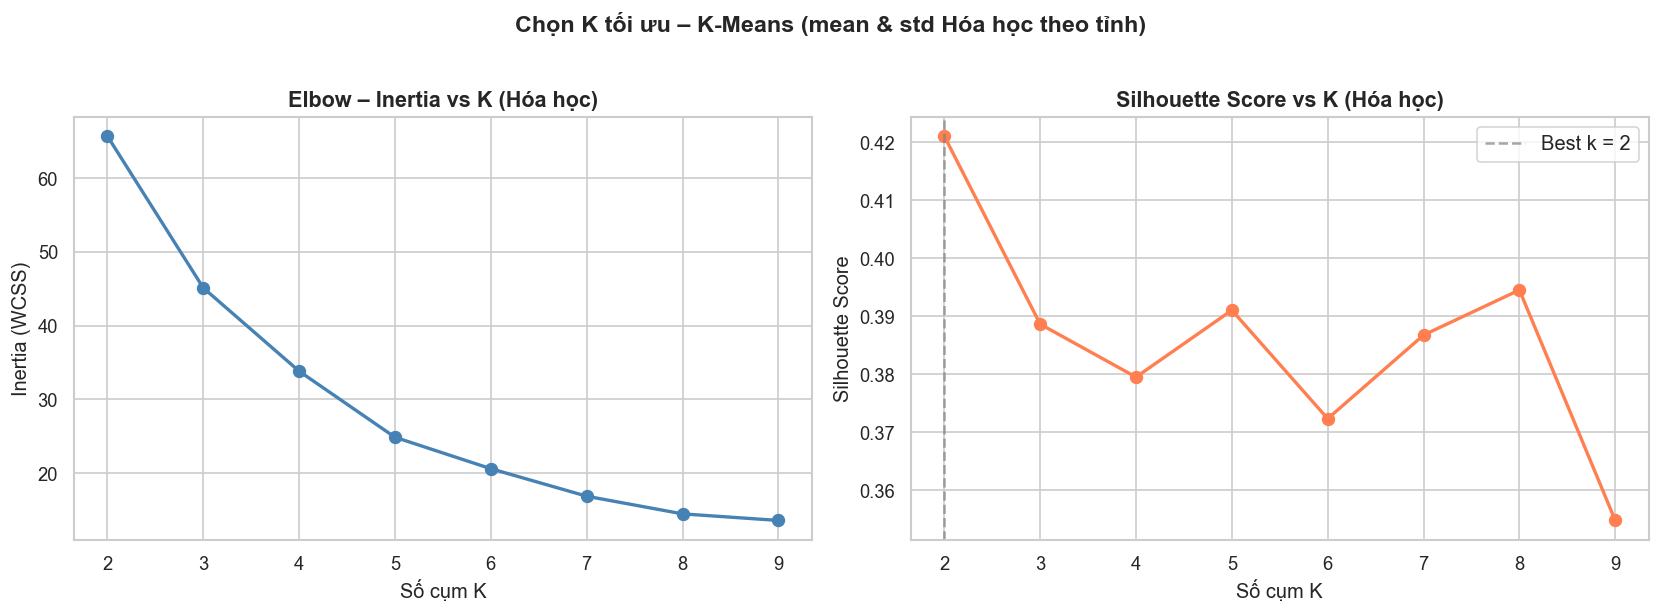

K tối ưu theo Silhouette (Hóa học): 2


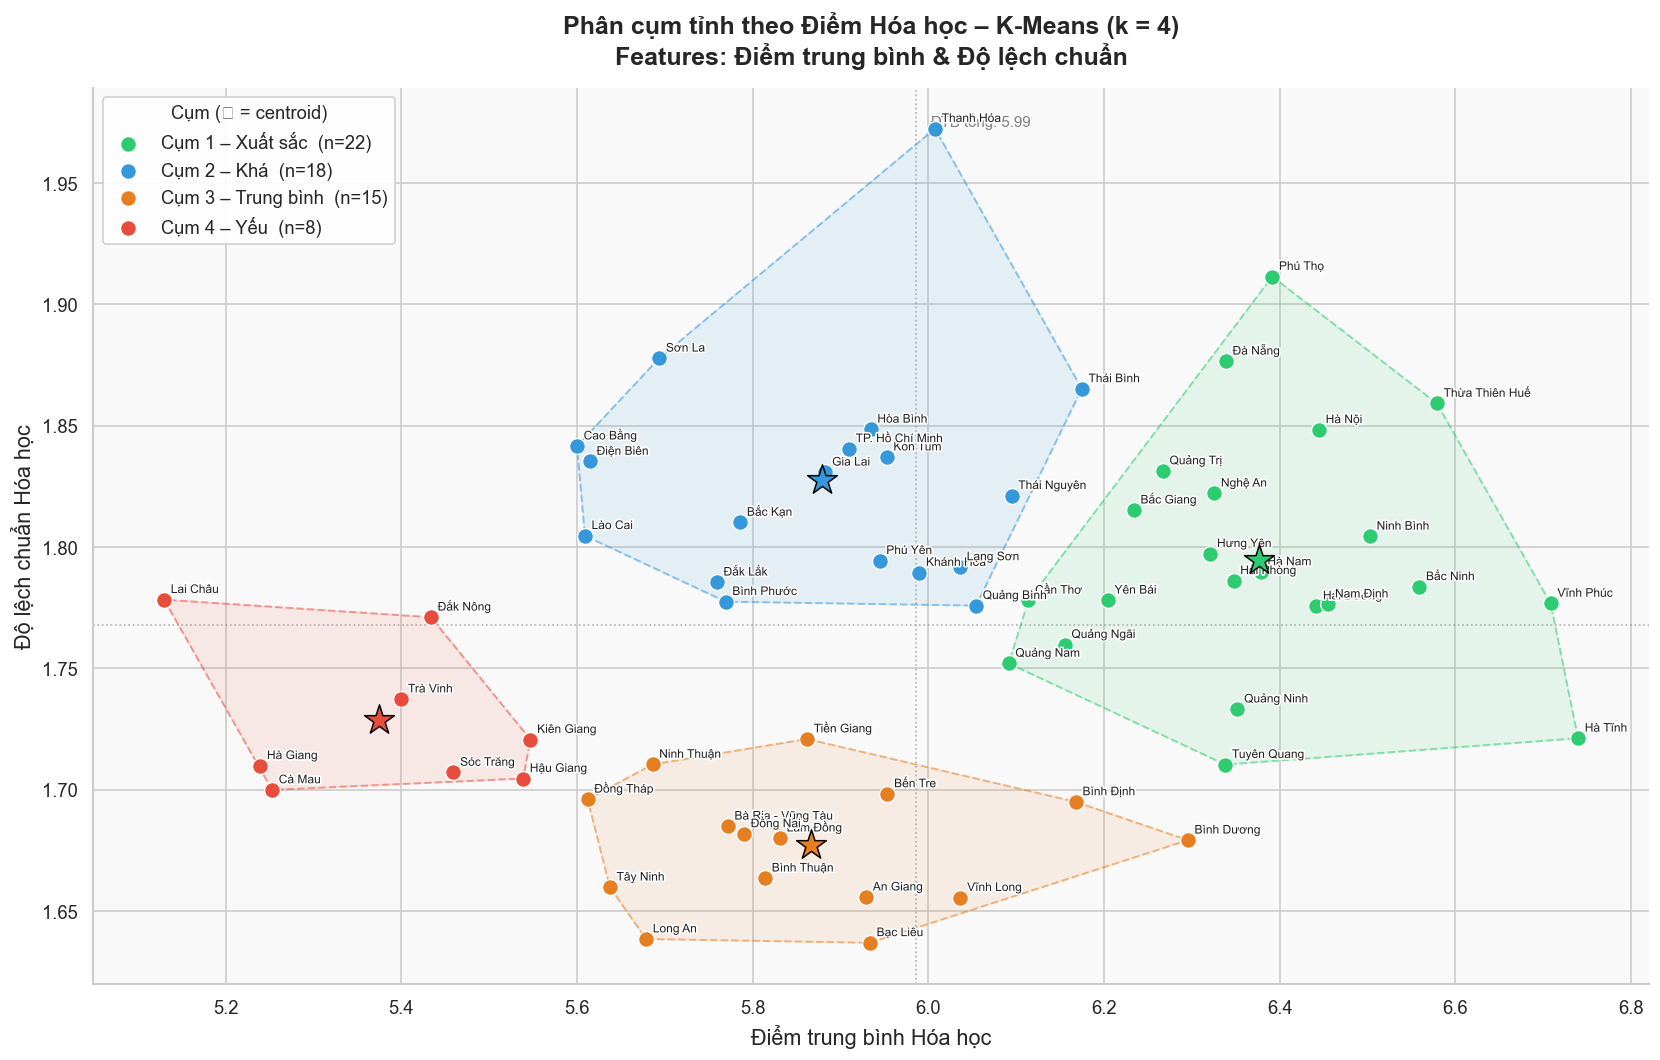

Saved: dist/charts/kmeans_hoa_k4_2d.png

=== THÀNH PHẦN CÁC CỤM (HÓA HỌC) ===

[Cụm 1] Cụm 1 – Xuất sắc — 22 tỉnh
  ĐTB Hóa học: 6.377  |  Std TB: 1.795
  Tỉnh: Hà Tĩnh, Vĩnh Phúc, Thừa Thiên Huế, Bắc Ninh, Ninh Bình, Nam Định, Hà Nội, Hải Dương, Phú Thọ, Hà Nam, Quảng Ninh, Hải Phòng, Đà Nẵng, Tuyên Quang, Nghệ An, Hưng Yên, Quảng Trị, Bắc Giang, Yên Bái, Quảng Ngãi, Cần Thơ, Quảng Nam

[Cụm 2] Cụm 2 – Khá — 18 tỉnh
  ĐTB Hóa học: 5.879  |  Std TB: 1.828
  Tỉnh: Thái Bình, Thái Nguyên, Quảng Bình, Lạng Sơn, Thanh Hóa, Khánh Hòa, Kon Tum, Phú Yên, Hòa Bình, TP. Hồ Chí Minh, Gia Lai, Bắc Kạn, Bình Phước, Đắk Lắk, Sơn La, Điện Biên, Lào Cai, Cao Bằng

[Cụm 3] Cụm 3 – Trung bình — 15 tỉnh
  ĐTB Hóa học: 5.867  |  Std TB: 1.677
  Tỉnh: Bình Dương, Bình Định, Vĩnh Long, Bến Tre, Bạc Liêu, An Giang, Tiền Giang, Lâm Đồng, Bình Thuận, Đồng Nai, Bà Rịa - Vũng Tàu, Ninh Thuận, Long An, Tây Ninh, Đồng Tháp

[Cụm 4] Cụm 4 – Yếu — 8 tỉnh
  ĐTB Hóa học: 5.375  |  Std TB: 1.729
  Tỉnh: Kiên Giang, Hậ

In [20]:

# ==============================
# Các môn thi đơn lẻ (dùng hàm kmeans_subject_2d)
# ==============================
van_stats = kmeans_subject_2d(df, subject_col='van', subject_label='Ngữ Văn')
li_stats  = kmeans_subject_2d(df, subject_col='li',  subject_label='Vật lí')
hoa_stats = kmeans_subject_2d(df, subject_col='hoa', subject_label='Hóa học')


Số thí sinh thi đủ Toán + Lý + Hóa: 165,467
Số tỉnh có dữ liệu: 63

Số tỉnh sau khi tính thống kê: 63

Top 10 tỉnh theo ĐTB tổng hợp:
          tinh  mean_toan  mean_li  mean_hoa  mean_all  std_all
     Vĩnh Phúc   6.944154 7.560358  6.675921  7.060144 1.554205
       Hà Tĩnh   6.577930 7.491260  6.778202  6.949131 1.527121
       Phú Thọ   6.700951 7.460961  6.572473  6.911461 1.614959
      Bắc Ninh   6.650201 7.487080  6.542163  6.893148 1.595405
        Hà Nội   6.757518 7.370908  6.470327  6.866251 1.633007
       Nghệ An   6.575625 7.464098  6.545330  6.861684 1.569948
        Hà Nam   6.546901 7.542751  6.452126  6.847260 1.537181
Thừa Thiên Huế   6.373874 7.496571  6.629837  6.833427 1.566687
     Hải Dương   6.635214 7.370145  6.489962  6.831774 1.564094
     Ninh Bình   6.559093 7.428595  6.488922  6.825537 1.591692


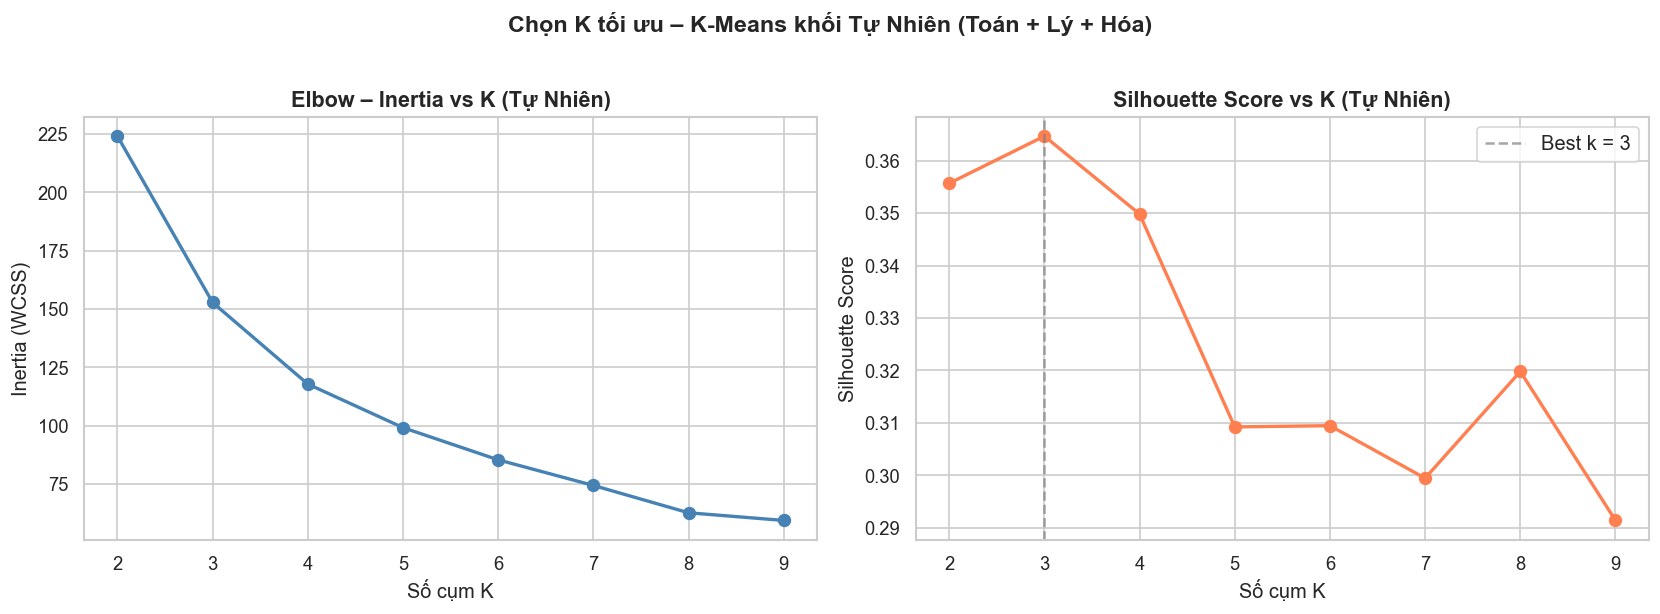

K tối ưu theo Silhouette: 3


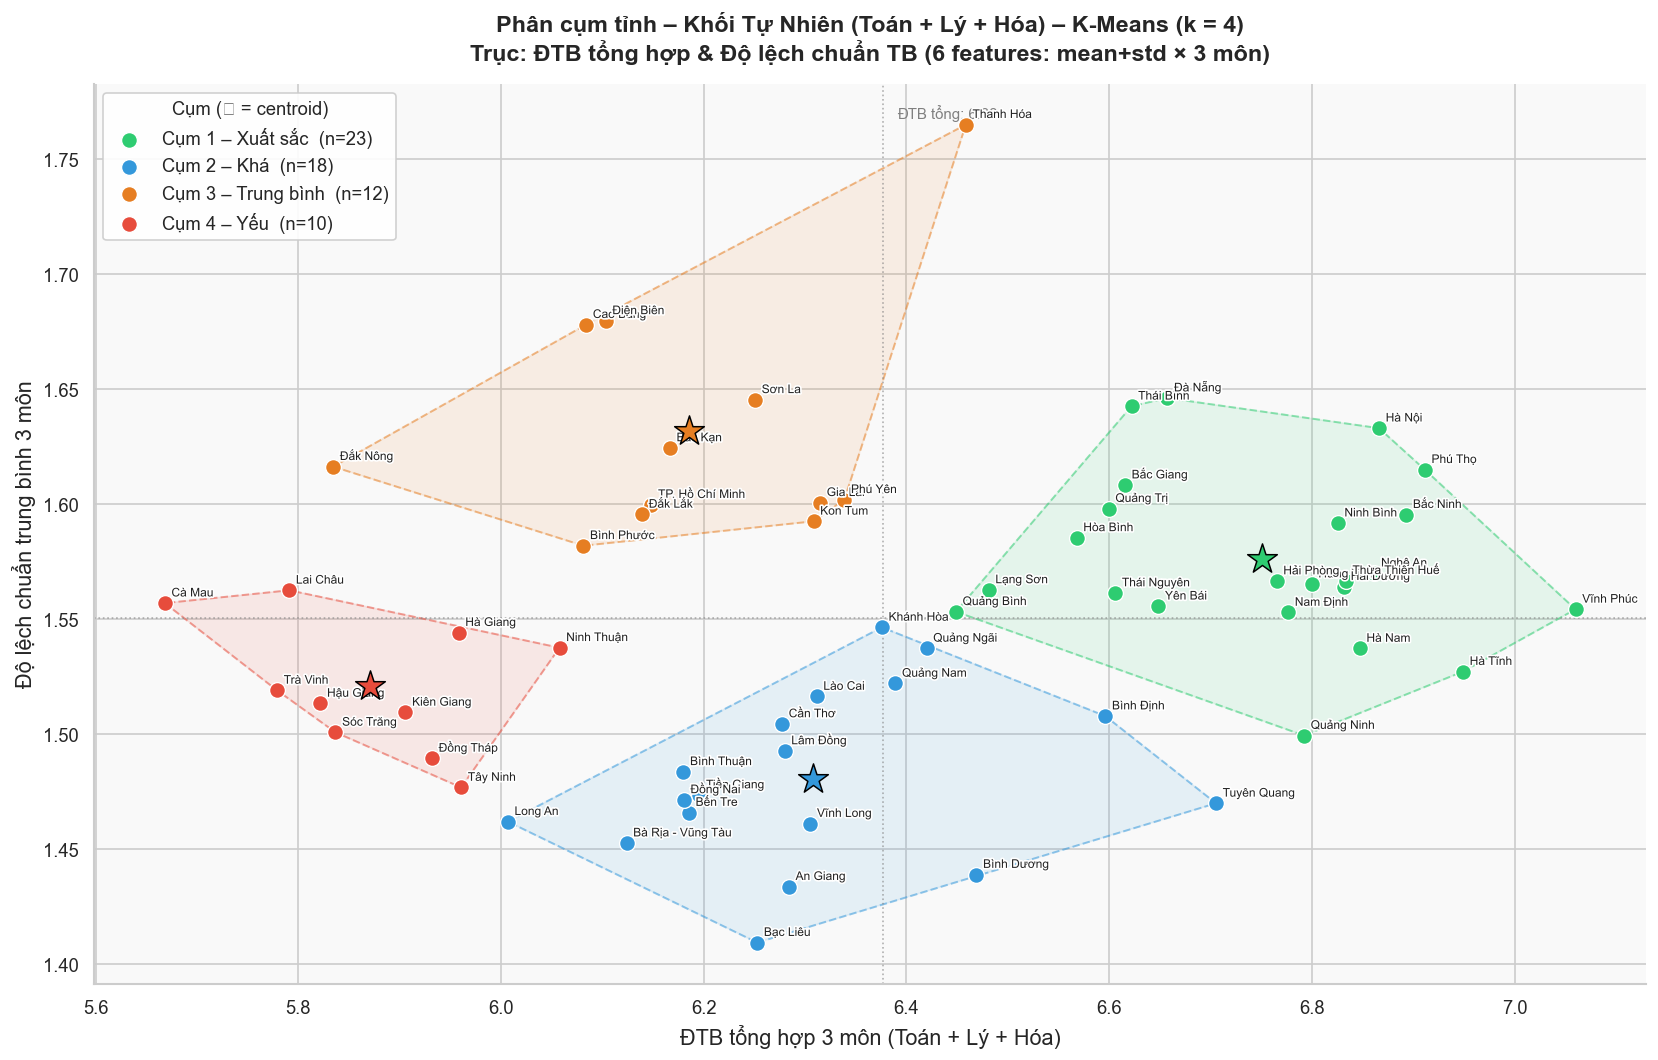

Saved: dist/charts/kmeans_natural_k4_2d.png

Tổng số thí sinh khối Tự Nhiên: 165,467

=== THÀNH PHẦN CÁC CỤM (KHỐI TỰ NHIÊN) ===

[Cụm 1] Cụm 1 – Xuất sắc — 23 tỉnh
  ĐTB Toán: 6.475  |  ĐTB Lý: 7.347  |  ĐTB Hóa: 6.429
  ĐTB tổng hợp: 6.750  |  Std TB: 1.576
  Tỉnh: Vĩnh Phúc, Hà Tĩnh, Phú Thọ, Bắc Ninh, Hà Nội, Nghệ An, Hà Nam, Thừa Thiên Huế, Hải Dương, Ninh Bình, Hưng Yên, Quảng Ninh, Nam Định, Hải Phòng, Đà Nẵng, Yên Bái, Thái Bình, Bắc Giang, Thái Nguyên, Quảng Trị, Hòa Bình, Lạng Sơn, Quảng Bình

[Cụm 2] Cụm 2 – Khá — 18 tỉnh
  ĐTB Toán: 5.829  |  ĐTB Lý: 7.103  |  ĐTB Hóa: 5.991
  ĐTB tổng hợp: 6.308  |  Std TB: 1.480
  Tỉnh: Tuyên Quang, Bình Định, Bình Dương, Quảng Ngãi, Quảng Nam, Khánh Hòa, Lào Cai, Vĩnh Long, An Giang, Lâm Đồng, Cần Thơ, Bạc Liêu, Tiền Giang, Bến Tre, Đồng Nai, Bình Thuận, Bà Rịa - Vũng Tàu, Long An

[Cụm 3] Cụm 3 – Trung bình — 12 tỉnh
  ĐTB Toán: 5.823  |  ĐTB Lý: 6.889  |  ĐTB Hóa: 5.844
  ĐTB tổng hợp: 6.186  |  Std TB: 1.632
  Tỉnh: Thanh Hóa, Phú Yên

In [21]:

# ==============================
# Phân cụm tỉnh theo khối Tự Nhiên (Toán + Lý + Hóa)
# Chỉ lấy thí sinh thi đủ cả 3 môn
# Features: mean_toan, std_toan, mean_li, std_li, mean_hoa, std_hoa (6 features / tỉnh)
# Hiển thị: scatter 2D với trục = mean tổng hợp & std tổng hợp của 3 môn
# ==============================
NATURAL_COLS = ['toan', 'li', 'hoa']
CLUSTER_COLORS = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']

# ── 1. Lọc thí sinh thi đủ 3 môn tự nhiên ──────────────────────────────────
df_natural = df.dropna(subset=NATURAL_COLS + ['tinh'])
df_natural = df_natural[df_natural[NATURAL_COLS].notna().all(axis=1)]
print(f"Số thí sinh thi đủ Toán + Lý + Hóa: {len(df_natural):,}")
print(f"Số tỉnh có dữ liệu: {df_natural['tinh'].nunique()}")

# ── 2. Tính mean & std của từng môn theo tỉnh ───────────────────────────────
agg_dict = {}
for col in NATURAL_COLS:
    agg_dict[f'mean_{col}'] = (col, 'mean')
    agg_dict[f'std_{col}']  = (col, 'std')

natural_stats = (
    df_natural.groupby('tinh')
    .agg(**agg_dict)
    .reset_index()
    .dropna()
)
print(f"\nSố tỉnh sau khi tính thống kê: {len(natural_stats)}")

# Thêm mean tổng hợp & std tổng hợp (trung bình của 3 môn) để dùng cho scatter 2D
natural_stats['mean_all'] = natural_stats[['mean_toan', 'mean_li', 'mean_hoa']].mean(axis=1)
natural_stats['std_all']  = natural_stats[['std_toan',  'std_li',  'std_hoa']].mean(axis=1)

print("\nTop 10 tỉnh theo ĐTB tổng hợp:")
print(natural_stats.nlargest(10, 'mean_all')[
    ['tinh', 'mean_toan', 'mean_li', 'mean_hoa', 'mean_all', 'std_all']
].to_string(index=False))

# ── 3. Chuẩn hóa 6 features → K-Means ──────────────────────────────────────
feat_cols = ['mean_toan', 'std_toan', 'mean_li', 'std_li', 'mean_hoa', 'std_hoa']
X_nat = natural_stats[feat_cols].values
scaler_nat = StandardScaler()
X_nat_scaled = scaler_nat.fit_transform(X_nat)

# ── 4. Elbow + Silhouette ────────────────────────────────────────────────────
K_range_nat = range(2, 10)
inertias_nat, sil_nat = [], []
for kk in K_range_nat:
    km_ = KMeans(n_clusters=kk, random_state=42, n_init=10)
    lbl_ = km_.fit_predict(X_nat_scaled)
    inertias_nat.append(km_.inertia_)
    sil_nat.append(silhouette_score(X_nat_scaled, lbl_))

best_k_nat = list(K_range_nat)[np.argmax(sil_nat)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(list(K_range_nat), inertias_nat, 'o-', color='steelblue', linewidth=2, markersize=7)
axes[0].set_title("Elbow – Inertia vs K (Tự Nhiên)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Số cụm K"); axes[0].set_ylabel("Inertia (WCSS)")
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

axes[1].plot(list(K_range_nat), sil_nat, 'o-', color='coral', linewidth=2, markersize=7)
axes[1].axvline(best_k_nat, linestyle='--', color='gray', alpha=0.7, label=f'Best k = {best_k_nat}')
axes[1].set_title("Silhouette Score vs K (Tự Nhiên)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Số cụm K"); axes[1].set_ylabel("Silhouette Score")
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1].legend(fontsize=12)

plt.suptitle("Chọn K tối ưu – K-Means khối Tự Nhiên (Toán + Lý + Hóa)",
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_natural_optimal_k.png", dpi=120, bbox_inches='tight')
plt.show()
print(f"K tối ưu theo Silhouette: {best_k_nat}")

# ── 5. Fit K=4 ──────────────────────────────────────────────────────────────
K_NAT = 4
km_nat = KMeans(n_clusters=K_NAT, random_state=42, n_init=10)
natural_stats['cluster'] = km_nat.fit_predict(X_nat_scaled)

cluster_order_nat = (
    natural_stats.groupby('cluster')['mean_all'].mean()
    .sort_values(ascending=False).index.tolist()
)
rank_map_nat = {c: i for i, c in enumerate(cluster_order_nat)}
natural_stats['cluster_rank'] = natural_stats['cluster'].map(rank_map_nat)

CLUSTER_LABELS_NAT = {
    0: "Cụm 1 – Xuất sắc",
    1: "Cụm 2 – Khá",
    2: "Cụm 3 – Trung bình",
    3: "Cụm 4 – Yếu",
}

# ── 6. Scatter 2D: trục X = mean_all, trục Y = std_all ──────────────────────
fig, ax = plt.subplots(figsize=(14, 9))
ax.set_facecolor('#f9f9f9')

for rank in range(K_NAT):
    sub = natural_stats[natural_stats['cluster_rank'] == rank]
    pts = sub[['mean_all', 'std_all']].values
    color = CLUSTER_COLORS[rank]
    if len(pts) >= 3:
        hull = ConvexHull(pts)
        hull_pts = np.append(hull.vertices, hull.vertices[0])
        ax.fill(pts[hull_pts, 0], pts[hull_pts, 1], alpha=0.10, color=color, zorder=1)
        ax.plot(pts[hull_pts, 0], pts[hull_pts, 1],
                linestyle='--', linewidth=1.2, color=color, alpha=0.5, zorder=2)

for rank in range(K_NAT):
    sub = natural_stats[natural_stats['cluster_rank'] == rank]
    ax.scatter(sub['mean_all'], sub['std_all'],
               label=f"{CLUSTER_LABELS_NAT[rank]}  (n={len(sub)})",
               color=CLUSTER_COLORS[rank],
               s=90, edgecolors='white', linewidths=0.8, zorder=4)

for _, row in natural_stats.iterrows():
    ax.annotate(
        row['tinh'],
        xy=(row['mean_all'], row['std_all']),
        xytext=(4, 4), textcoords='offset points',
        fontsize=7.2, color='#222222',
        path_effects=[pe.withStroke(linewidth=2, foreground='white')],
        zorder=5
    )

# Centroid ★ (chuyển về không gian gốc rồi tính mean_all / std_all)
centers_nat_orig = scaler_nat.inverse_transform(km_nat.cluster_centers_)
for i, center in enumerate(centers_nat_orig):
    cr = rank_map_nat[i]
    c_mean_all = np.mean([center[feat_cols.index(f'mean_{c}')] for c in NATURAL_COLS])
    c_std_all  = np.mean([center[feat_cols.index(f'std_{c}')]  for c in NATURAL_COLS])
    ax.scatter(c_mean_all, c_std_all,
               marker='*', s=350, color=CLUSTER_COLORS[cr],
               edgecolors='black', linewidths=0.9, zorder=6)

grand_mean_nat = natural_stats['mean_all'].mean()
grand_std_nat  = natural_stats['std_all'].mean()
ax.axvline(grand_mean_nat, color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.axhline(grand_std_nat,  color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.text(grand_mean_nat + (natural_stats['mean_all'].max() - natural_stats['mean_all'].min()) * 0.01,
        ax.get_ylim()[1] * 0.995,
        f'ĐTB tổng: {grand_mean_nat:.2f}', fontsize=9, color='gray', va='top')

ax.set_title(
    "Phân cụm tỉnh – Khối Tự Nhiên (Toán + Lý + Hóa) – K-Means (k = 4)\n"
    "Trục: ĐTB tổng hợp & Độ lệch chuẩn TB (6 features: mean+std × 3 môn)",
    fontsize=14, fontweight='bold', pad=14
)
ax.set_xlabel("ĐTB tổng hợp 3 môn (Toán + Lý + Hóa)", fontsize=13)
ax.set_ylabel("Độ lệch chuẩn trung bình 3 môn", fontsize=13)
ax.tick_params(labelsize=11)
ax.legend(fontsize=11, title="Cụm (★ = centroid)", title_fontsize=11,
          framealpha=0.9, loc='upper left')
sns.despine()
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_natural_k4_2d.png", dpi=130, bbox_inches='tight')
plt.show()
print(f"Saved: {output_dir}/kmeans_natural_k4_2d.png")

# ── 7. Bảng tổng hợp ────────────────────────────────────────────────────────
print(f"\nTổng số thí sinh khối Tự Nhiên: {len(df_natural):,}")
print(f"\n=== THÀNH PHẦN CÁC CỤM (KHỐI TỰ NHIÊN) ===")
for rank in range(K_NAT):
    sub = natural_stats[natural_stats['cluster_rank'] == rank].sort_values('mean_all', ascending=False)
    print(f"\n[Cụm {rank+1}] {CLUSTER_LABELS_NAT[rank]} — {len(sub)} tỉnh")
    print(f"  ĐTB Toán: {sub['mean_toan'].mean():.3f}  |  ĐTB Lý: {sub['mean_li'].mean():.3f}  |  ĐTB Hóa: {sub['mean_hoa'].mean():.3f}")
    print(f"  ĐTB tổng hợp: {sub['mean_all'].mean():.3f}  |  Std TB: {sub['std_all'].mean():.3f}")
    print(f"  Tỉnh: {', '.join(sub['tinh'].tolist())}")


Số thí sinh thi đủ Văn + Sử + Địa: 310,012
Số tỉnh có dữ liệu: 63

Số tỉnh sau khi tính thống kê: 63

Top 10 tỉnh theo ĐTB tổng hợp:
          tinh  mean_van  mean_su  mean_dia  mean_all  std_all
       Nghệ An  8.012666 6.985664  7.243841  7.414057 1.552088
     Vĩnh Phúc  7.535350 7.011868  7.290336  7.279185 1.420385
       Phú Thọ  7.067719 7.174641  7.351740  7.198033 1.536480
      Bạc Liêu  7.005435 7.030054  7.159906  7.065132 1.353137
    Bình Dương  6.665889 7.050437  7.392533  7.036287 1.242941
     Quảng Trị  7.172273 6.745811  7.086564  7.001549 1.645887
      Nam Định  6.609444 7.004804  7.268146  6.960798 1.438517
Thừa Thiên Huế  7.129439 6.692907  6.975814  6.932720 1.541040
      An Giang  6.930562 6.800644  6.980934  6.904047 1.490997
        Cà Mau  6.885151 6.835979  6.968201  6.896444 1.440384


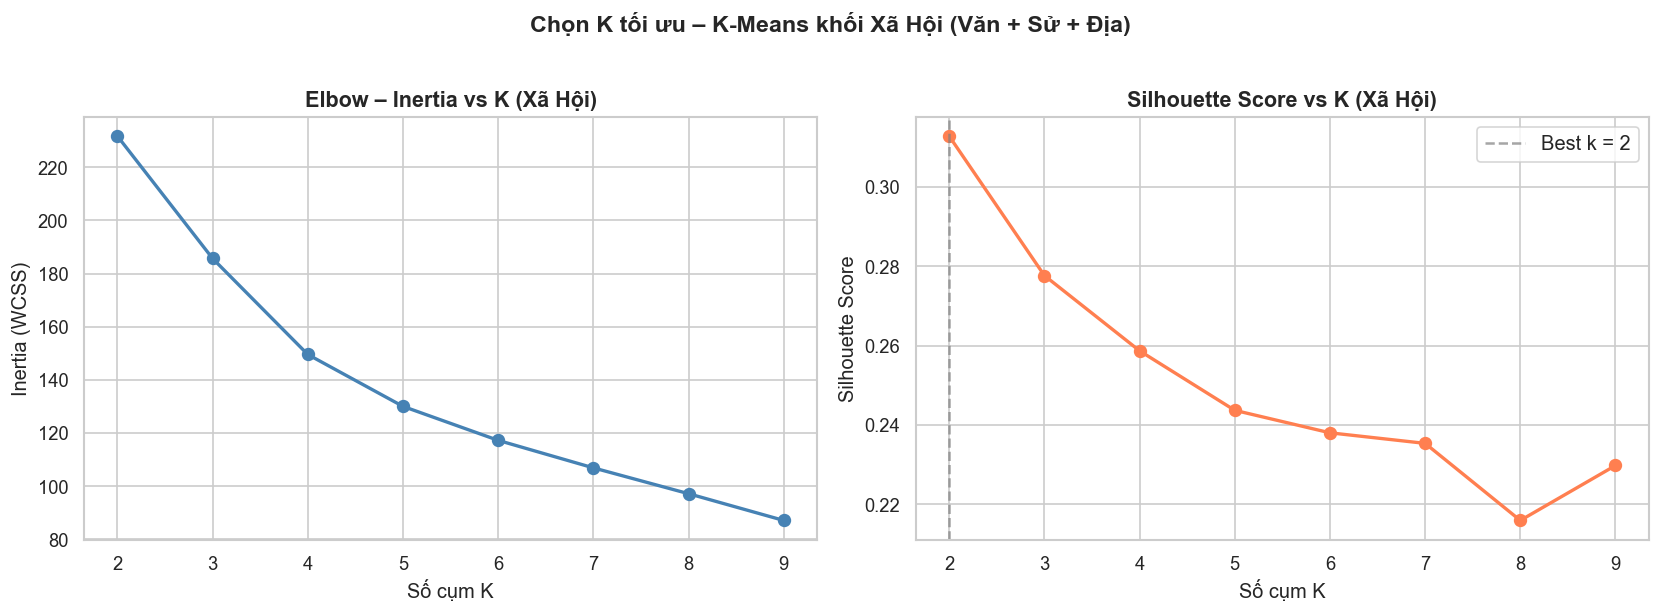

K tối ưu theo Silhouette: 2


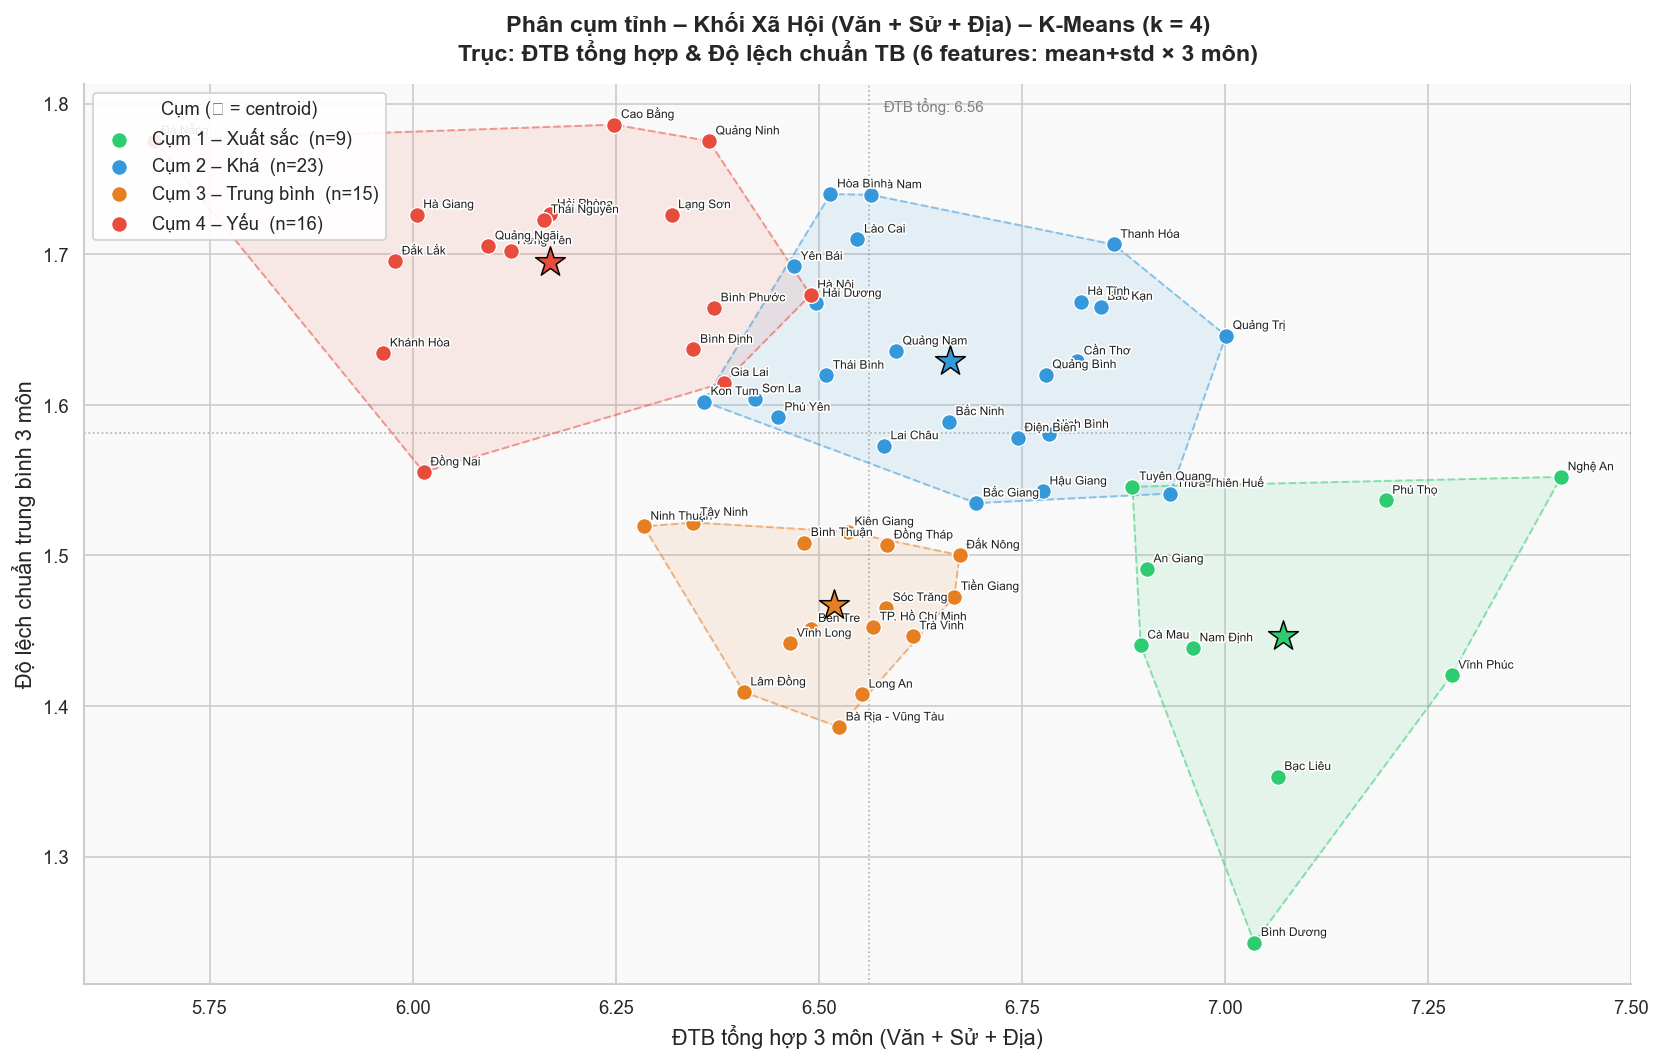

Saved: dist/charts/kmeans_social_k4_2d.png

Tổng số thí sinh khối Xã Hội: 310,012

=== THÀNH PHẦN CÁC CỤM (KHỐI XÃ HỘI) ===

[Cụm 1] Cụm 1 – Xuất sắc — 9 tỉnh
  ĐTB Văn: 7.046  |  ĐTB Sử: 6.973  |  ĐTB Địa: 7.193
  ĐTB tổng hợp: 7.071  |  Std TB: 1.447
  Tỉnh: Nghệ An, Vĩnh Phúc, Phú Thọ, Bạc Liêu, Bình Dương, Nam Định, An Giang, Cà Mau, Tuyên Quang

[Cụm 2] Cụm 2 – Khá — 23 tỉnh
  ĐTB Văn: 6.673  |  ĐTB Sử: 6.550  |  ĐTB Địa: 6.764
  ĐTB tổng hợp: 6.662  |  Std TB: 1.629
  Tỉnh: Quảng Trị, Thừa Thiên Huế, Thanh Hóa, Bắc Kạn, Hà Tĩnh, Cần Thơ, Ninh Bình, Quảng Bình, Hậu Giang, Điện Biên, Bắc Giang, Bắc Ninh, Quảng Nam, Lai Châu, Hà Nam, Lào Cai, Hòa Bình, Thái Bình, Hải Dương, Yên Bái, Phú Yên, Sơn La, Kon Tum

[Cụm 3] Cụm 3 – Trung bình — 15 tỉnh
  ĐTB Văn: 6.544  |  ĐTB Sử: 6.406  |  ĐTB Địa: 6.607
  ĐTB tổng hợp: 6.519  |  Std TB: 1.467
  Tỉnh: Đắk Nông, Tiền Giang, Trà Vinh, Đồng Tháp, Sóc Trăng, TP. Hồ Chí Minh, Long An, Kiên Giang, Bà Rịa - Vũng Tàu, Bến Tre, Bình Thuận, Vĩnh Lon

In [22]:

# ==============================
# Phân cụm tỉnh theo khối Xã Hội (Văn + Sử + Địa)
# Chỉ lấy thí sinh thi đủ cả 3 môn
# Features: mean & std của từng môn → 6 features / tỉnh
# ==============================
SOCIAL_COLS = ['van', 'su', 'dia']
CLUSTER_COLORS = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']

# ── 1. Lọc thí sinh thi đủ 3 môn xã hội ────────────────────────────────────
df_social = df.dropna(subset=SOCIAL_COLS + ['tinh'])
df_social = df_social[df_social[SOCIAL_COLS].notna().all(axis=1)]
print(f"Số thí sinh thi đủ Văn + Sử + Địa: {len(df_social):,}")
print(f"Số tỉnh có dữ liệu: {df_social['tinh'].nunique()}")

# ── 2. Tính mean & std của từng môn theo tỉnh ───────────────────────────────
agg_dict_soc = {}
for col in SOCIAL_COLS:
    agg_dict_soc[f'mean_{col}'] = (col, 'mean')
    agg_dict_soc[f'std_{col}']  = (col, 'std')

social_stats = (
    df_social.groupby('tinh')
    .agg(**agg_dict_soc)
    .reset_index()
    .dropna()
)

social_stats['mean_all'] = social_stats[['mean_van', 'mean_su', 'mean_dia']].mean(axis=1)
social_stats['std_all']  = social_stats[['std_van',  'std_su',  'std_dia']].mean(axis=1)

print(f"\nSố tỉnh sau khi tính thống kê: {len(social_stats)}")
print("\nTop 10 tỉnh theo ĐTB tổng hợp:")
print(social_stats.nlargest(10, 'mean_all')[
    ['tinh', 'mean_van', 'mean_su', 'mean_dia', 'mean_all', 'std_all']
].to_string(index=False))

# ── 3. Chuẩn hóa 6 features → K-Means ──────────────────────────────────────
feat_cols_soc = ['mean_van', 'std_van', 'mean_su', 'std_su', 'mean_dia', 'std_dia']
X_soc = social_stats[feat_cols_soc].values
scaler_soc = StandardScaler()
X_soc_scaled = scaler_soc.fit_transform(X_soc)

# ── 4. Elbow + Silhouette ────────────────────────────────────────────────────
K_range_soc = range(2, 10)
inertias_soc, sil_soc = [], []
for kk in K_range_soc:
    km_ = KMeans(n_clusters=kk, random_state=42, n_init=10)
    lbl_ = km_.fit_predict(X_soc_scaled)
    inertias_soc.append(km_.inertia_)
    sil_soc.append(silhouette_score(X_soc_scaled, lbl_))

best_k_soc = list(K_range_soc)[np.argmax(sil_soc)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(list(K_range_soc), inertias_soc, 'o-', color='steelblue', linewidth=2, markersize=7)
axes[0].set_title("Elbow – Inertia vs K (Xã Hội)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Số cụm K"); axes[0].set_ylabel("Inertia (WCSS)")
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

axes[1].plot(list(K_range_soc), sil_soc, 'o-', color='coral', linewidth=2, markersize=7)
axes[1].axvline(best_k_soc, linestyle='--', color='gray', alpha=0.7, label=f'Best k = {best_k_soc}')
axes[1].set_title("Silhouette Score vs K (Xã Hội)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Số cụm K"); axes[1].set_ylabel("Silhouette Score")
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1].legend(fontsize=12)

plt.suptitle("Chọn K tối ưu – K-Means khối Xã Hội (Văn + Sử + Địa)",
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_social_optimal_k.png", dpi=120, bbox_inches='tight')
plt.show()
print(f"K tối ưu theo Silhouette: {best_k_soc}")

# ── 5. Fit K=4 ──────────────────────────────────────────────────────────────
K_SOC = 4
km_soc = KMeans(n_clusters=K_SOC, random_state=42, n_init=10)
social_stats['cluster'] = km_soc.fit_predict(X_soc_scaled)

cluster_order_soc = (
    social_stats.groupby('cluster')['mean_all'].mean()
    .sort_values(ascending=False).index.tolist()
)
rank_map_soc = {c: i for i, c in enumerate(cluster_order_soc)}
social_stats['cluster_rank'] = social_stats['cluster'].map(rank_map_soc)

CLUSTER_LABELS_SOC = {
    0: "Cụm 1 – Xuất sắc",
    1: "Cụm 2 – Khá",
    2: "Cụm 3 – Trung bình",
    3: "Cụm 4 – Yếu",
}

# ── 6. Scatter 2D: trục X = mean_all, trục Y = std_all ──────────────────────
fig, ax = plt.subplots(figsize=(14, 9))
ax.set_facecolor('#f9f9f9')

for rank in range(K_SOC):
    sub = social_stats[social_stats['cluster_rank'] == rank]
    pts = sub[['mean_all', 'std_all']].values
    color = CLUSTER_COLORS[rank]
    if len(pts) >= 3:
        hull = ConvexHull(pts)
        hull_pts = np.append(hull.vertices, hull.vertices[0])
        ax.fill(pts[hull_pts, 0], pts[hull_pts, 1], alpha=0.10, color=color, zorder=1)
        ax.plot(pts[hull_pts, 0], pts[hull_pts, 1],
                linestyle='--', linewidth=1.2, color=color, alpha=0.5, zorder=2)

for rank in range(K_SOC):
    sub = social_stats[social_stats['cluster_rank'] == rank]
    ax.scatter(sub['mean_all'], sub['std_all'],
               label=f"{CLUSTER_LABELS_SOC[rank]}  (n={len(sub)})",
               color=CLUSTER_COLORS[rank],
               s=90, edgecolors='white', linewidths=0.8, zorder=4)

for _, row in social_stats.iterrows():
    ax.annotate(
        row['tinh'],
        xy=(row['mean_all'], row['std_all']),
        xytext=(4, 4), textcoords='offset points',
        fontsize=7.2, color='#222222',
        path_effects=[pe.withStroke(linewidth=2, foreground='white')],
        zorder=5
    )

centers_soc_orig = scaler_soc.inverse_transform(km_soc.cluster_centers_)
for i, center in enumerate(centers_soc_orig):
    cr = rank_map_soc[i]
    c_mean_all = np.mean([center[feat_cols_soc.index(f'mean_{c}')] for c in SOCIAL_COLS])
    c_std_all  = np.mean([center[feat_cols_soc.index(f'std_{c}')]  for c in SOCIAL_COLS])
    ax.scatter(c_mean_all, c_std_all,
               marker='*', s=350, color=CLUSTER_COLORS[cr],
               edgecolors='black', linewidths=0.9, zorder=6)

grand_mean_soc = social_stats['mean_all'].mean()
grand_std_soc  = social_stats['std_all'].mean()
ax.axvline(grand_mean_soc, color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.axhline(grand_std_soc,  color='gray', linestyle=':', linewidth=1.0, alpha=0.6)
ax.text(grand_mean_soc + (social_stats['mean_all'].max() - social_stats['mean_all'].min()) * 0.01,
        ax.get_ylim()[1] * 0.995,
        f'ĐTB tổng: {grand_mean_soc:.2f}', fontsize=9, color='gray', va='top')

ax.set_title(
    "Phân cụm tỉnh – Khối Xã Hội (Văn + Sử + Địa) – K-Means (k = 4)\n"
    "Trục: ĐTB tổng hợp & Độ lệch chuẩn TB (6 features: mean+std × 3 môn)",
    fontsize=14, fontweight='bold', pad=14
)
ax.set_xlabel("ĐTB tổng hợp 3 môn (Văn + Sử + Địa)", fontsize=13)
ax.set_ylabel("Độ lệch chuẩn trung bình 3 môn", fontsize=13)
ax.tick_params(labelsize=11)
ax.legend(fontsize=11, title="Cụm (★ = centroid)", title_fontsize=11,
          framealpha=0.9, loc='upper left')
sns.despine()
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_social_k4_2d.png", dpi=130, bbox_inches='tight')
plt.show()
print(f"Saved: {output_dir}/kmeans_social_k4_2d.png")

# ── 7. Bảng tổng hợp ────────────────────────────────────────────────────────
print(f"\nTổng số thí sinh khối Xã Hội: {len(df_social):,}")
print(f"\n=== THÀNH PHẦN CÁC CỤM (KHỐI XÃ HỘI) ===")
for rank in range(K_SOC):
    sub = social_stats[social_stats['cluster_rank'] == rank].sort_values('mean_all', ascending=False)
    print(f"\n[Cụm {rank+1}] {CLUSTER_LABELS_SOC[rank]} — {len(sub)} tỉnh")
    print(f"  ĐTB Văn: {sub['mean_van'].mean():.3f}  |  ĐTB Sử: {sub['mean_su'].mean():.3f}  |  ĐTB Địa: {sub['mean_dia'].mean():.3f}")
    print(f"  ĐTB tổng hợp: {sub['mean_all'].mean():.3f}  |  Std TB: {sub['std_all'].mean():.3f}")
    print(f"  Tỉnh: {', '.join(sub['tinh'].tolist())}")


  So sánh điểm Toán: Quảng Nam vs Đà Nẵng
  Tỉnh                     n     Mean      Std
  -----------------------------------------
  Quảng Nam           18,047   4.6488   1.6233
  Đà Nẵng             14,202   5.1873   1.7068
  Chênh lệch ĐTB               0.5385

── Levene's test (phương sai đồng nhất)
   Statistic = 60.6959,  p-value = 6.8599e-15
   → Phương sai KHÁC NHAU (p ≤ 0.05)

── Welch's t-test (H₀: μ₁ = μ₂, hai phía)
   t-statistic = -28.7378,  p-value = 3.6224e-179
   → BÁC BỎ H₀ (α = 0.05)
   → Chênh lệch CÓ ý nghĩa thống kê. Đà Nẵng có ĐTB Toán cao hơn.

── Effect size: Cohen's d = -0.3243  →  nhỏ-vừa

── Mann-Whitney U test (phi tham số)
   U = 104281276,  p-value = 4.8149e-182
   → BÁC BỎ H₀ (α = 0.05)


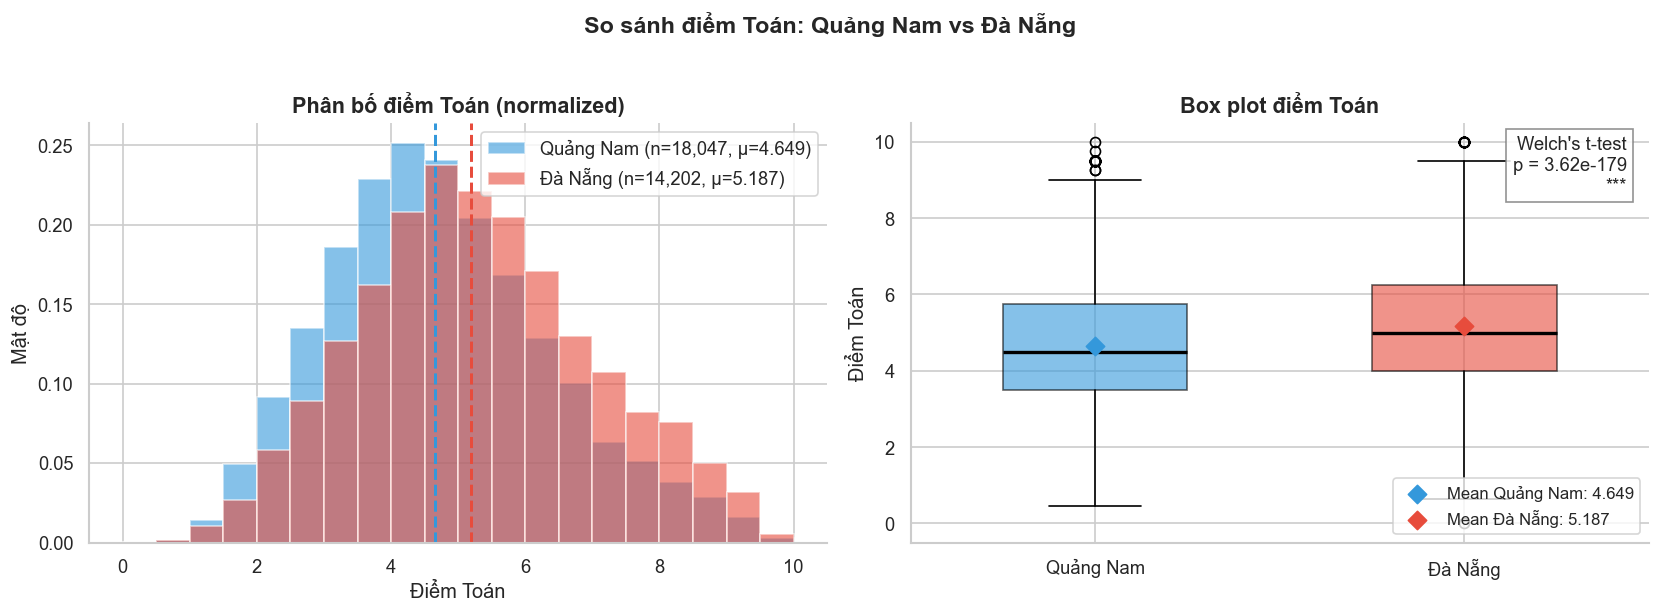

Saved: dist/charts/hypothesis_toan_qnam_danang.png


In [23]:

# ==============================
# Hypothesis Testing: Điểm Toán – Quảng Nam vs Đà Nẵng
# ==============================
from scipy import stats

TINH_A = "Quảng Nam"
TINH_B = "Đà Nẵng"

# Lấy điểm Toán của từng tỉnh (bỏ NaN)
scores_a = df[df['tinh'] == TINH_A]['toan'].dropna().values
scores_b = df[df['tinh'] == TINH_B]['toan'].dropna().values

n_a, n_b = len(scores_a), len(scores_b)
mean_a, mean_b = scores_a.mean(), scores_b.mean()
std_a,  std_b  = scores_a.std(ddof=1), scores_b.std(ddof=1)

print("=" * 55)
print(f"  So sánh điểm Toán: {TINH_A} vs {TINH_B}")
print("=" * 55)
print(f"  {'Tỉnh':<18} {'n':>7} {'Mean':>8} {'Std':>8}")
print(f"  {'-'*41}")
print(f"  {TINH_A:<18} {n_a:>7,} {mean_a:>8.4f} {std_a:>8.4f}")
print(f"  {TINH_B:<18} {n_b:>7,} {mean_b:>8.4f} {std_b:>8.4f}")
print(f"  {'Chênh lệch ĐTB':<18} {'':>7} {abs(mean_a - mean_b):>8.4f}")

# ── Kiểm định Levene: phương sai bằng nhau? ─────────────────────────────────
lev_stat, lev_p = stats.levene(scores_a, scores_b)
equal_var = lev_p > 0.05
print(f"\n── Levene's test (phương sai đồng nhất)")
print(f"   Statistic = {lev_stat:.4f},  p-value = {lev_p:.4e}")
print(f"   → {'Phương sai BẰNG NHAU (p > 0.05)' if equal_var else 'Phương sai KHÁC NHAU (p ≤ 0.05)'}")

# ── Welch's t-test (two-sided) ───────────────────────────────────────────────
t_stat, t_p = stats.ttest_ind(scores_a, scores_b, equal_var=equal_var)
print(f"\n── {'Student' if equal_var else 'Welch'}'s t-test (H₀: μ₁ = μ₂, hai phía)")
print(f"   t-statistic = {t_stat:.4f},  p-value = {t_p:.4e}")
alpha = 0.05
print(f"   → {'BÁC BỎ H₀' if t_p < alpha else 'KHÔNG đủ bằng chứng bác bỏ H₀'} (α = {alpha})")
if t_p < alpha:
    winner = TINH_A if mean_a > mean_b else TINH_B
    print(f"   → Chênh lệch CÓ ý nghĩa thống kê. {winner} có ĐTB Toán cao hơn.")
else:
    print(f"   → Chênh lệch KHÔNG có ý nghĩa thống kê.")

# ── Effect size: Cohen's d ───────────────────────────────────────────────────
pooled_std = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))
cohens_d   = (mean_a - mean_b) / pooled_std
magnitude  = ("nhỏ (small)"    if abs(cohens_d) < 0.2 else
              "nhỏ-vừa"        if abs(cohens_d) < 0.5 else
              "vừa (medium)"   if abs(cohens_d) < 0.8 else
              "lớn (large)")
print(f"\n── Effect size: Cohen's d = {cohens_d:.4f}  →  {magnitude}")

# ── Mann-Whitney U (phi tham số, kiểm tra thêm) ─────────────────────────────
u_stat, u_p = stats.mannwhitneyu(scores_a, scores_b, alternative='two-sided')
print(f"\n── Mann-Whitney U test (phi tham số)")
print(f"   U = {u_stat:.0f},  p-value = {u_p:.4e}")
print(f"   → {'BÁC BỎ H₀' if u_p < alpha else 'KHÔNG đủ bằng chứng bác bỏ H₀'} (α = {alpha})")

# ── Biểu đồ so sánh phân bố ─────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bins = np.arange(0, 10.5, 0.5)
color_a, color_b = '#3498db', '#e74c3c'

# Histogram so sánh
axes[0].hist(scores_a, bins=bins, alpha=0.6, color=color_a,
             label=f"{TINH_A} (n={n_a:,}, μ={mean_a:.3f})", density=True)
axes[0].hist(scores_b, bins=bins, alpha=0.6, color=color_b,
             label=f"{TINH_B} (n={n_b:,}, μ={mean_b:.3f})", density=True)
axes[0].axvline(mean_a, color=color_a, linestyle='--', linewidth=1.8)
axes[0].axvline(mean_b, color=color_b, linestyle='--', linewidth=1.8)
axes[0].set_title("Phân bố điểm Toán (normalized)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Điểm Toán"); axes[0].set_ylabel("Mật độ")
axes[0].legend(fontsize=11)
sns.despine(ax=axes[0])

# Box plot
data_box  = [scores_a, scores_b]
labels_box = [TINH_A, TINH_B]
bp = axes[1].boxplot(data_box, labels=labels_box, patch_artist=True,
                     medianprops=dict(color='black', linewidth=2),
                     widths=0.5)
for patch, color in zip(bp['boxes'], [color_a, color_b]):
    patch.set_facecolor(color); patch.set_alpha(0.6)

# Thêm mean marker
for i, (scores, color) in enumerate(zip(data_box, [color_a, color_b]), start=1):
    axes[1].scatter(i, scores.mean(), marker='D', color=color, s=60,
                    zorder=5, label=f"Mean {labels_box[i-1]}: {scores.mean():.3f}")

# Chú thích p-value
sig_text = f"Welch's t-test\np = {t_p:.2e}\n{'***' if t_p < 0.001 else '**' if t_p < 0.01 else '*' if t_p < 0.05 else 'ns'}"
axes[1].text(0.97, 0.97, sig_text, transform=axes[1].transAxes,
             ha='right', va='top', fontsize=11,
             bbox=dict(facecolor='white', edgecolor='gray', alpha=0.85))
axes[1].set_title("Box plot điểm Toán", fontsize=13, fontweight='bold')
axes[1].set_ylabel("Điểm Toán")
axes[1].legend(fontsize=10, loc='lower right')
sns.despine(ax=axes[1])

plt.suptitle(f"So sánh điểm Toán: {TINH_A} vs {TINH_B}",
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f"{output_dir}/hypothesis_toan_qnam_danang.png", dpi=120, bbox_inches='tight')
plt.show()
print(f"Saved: {output_dir}/hypothesis_toan_qnam_danang.png")
